# MD004 ENTREGA6 ANÁLISIS DE COMPONENTES PRINCIPALES

- Gerard Pascual Fontanilles
  
**Descripción de la tarea:**

El fichero 20250212_DatosBoston.csv incluye datos de precios del mercado de viviendas de Boston (median_value), así como datos adicionales sobre la ubicación de la vivienda y otros datos sociodemográficos. La descripción de las columnas del dataset es la que sigue:

- **crime_index**: Índice de criminalidad de la zona
- **urban_ratio**: Ratio de zona urbana residencial sobre el total
- **industry_ratio**: Ratio de industria de la zona
- **c_river_variable**: 1 si la zona colinda con un río y 0 si no
- **nox_concentration**: Concentración de óxido nitroso en la zona
- **rooms_per_dwelling**: Número de habitaciones medio por vivienda
- **dwelling_age**: “Edad” media de la vivienda
- **dwelling_dist**: Distancia media ponderada con los centros urbanos de la ciudad
- **highway_index**: Índice de accesibilidad sobre autopistas cercanas
- **tax_ratio**: Índice de tasas por cada 10000usd
- **teacher_ratio**: Ratio de alumno por profesor
- **racial_index**: Índice de proporción de población no caucásica
- **lower_status**: Porcentaje de población de “clase-baja”
- **median_value**: Valor medio de precio de la vivienda (En 1000USD)

**Se pide:**

1. **Visualización y familiarización del dataset (2p)**: Se valorará el uso de las técnicas empleadas, así como la explicación de las visualizaciones / estadísticos utilizados en clases anteriores.
2. **Análisis de correlación y de componentes principales (3p)**: Se valorará principalmente la interpretación de dichos análisis así como la “limpieza” de la presentación
3. **Análisis de ANOVA (2p)**: Se valorará principalmente la interpretación del análisis, así como la limpieza de los datos
4. **Desarrollo y justificación de las variables (1p)**: En base a las conclusiones sacadas en los puntos 1, 2, y 3 ¿Qué variables debemos utilizar en nuestro modelo de regresión lineal?
5. **Estudio de regresión lineal del median_value (2p)**: ¿Qué resultados obtenemos en el modelo?,  ¿Predice correctamente?, ¿Utilizarías este modelo en la vida real?  

<font color='red'> **Entrega: fichero Jupyter Notebook con MD004NombreApellidosAC06.ipynb y fichero .pdf con MD004NombreApellidosAC04.pdf** </font>

### <font color='#3d59c6'>  Carga de Paquetes </font>

In [24]:
library(dplyr)
library(MASS)
library(class)
library(corrplot)
library(ggplot2)
library(gridExtra)
library(GGally)
library(nortest)
library(caret)
library(MASS)
library(lmtest)
library(olsrr)
library(RColorBrewer)
library(factoextra)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [2]:
options(repr.plot.width = 18, repr.plot.height = 12)

## <font color='#3d59c6'> 0. Carga de Datos </font>

In [3]:
data_boston <- read.csv(
  file = "202512S1_DatosBoston.csv",
  header = TRUE, sep = ";", dec = "."
)

## <font color='#3d59c6'> 1. Visualización y familiarización del dataset </font>

In [4]:
str(data_boston)

'data.frame':	506 obs. of  14 variables:
 $ crime_index       : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ urban_ratio       : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ industry_ratio    : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ c_river_variable  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox_concentration : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rooms_per_dwelling: num  6.58 6.42 7.18 7 7.15 ...
 $ dwelling_age      : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dwelling_dist     : num  4.09 49.67 49.67 60.62 60.62 ...
 $ highway_index     : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax_ratio         : int  296 242 242 222 222 222 311 311 311 311 ...
 $ teacher_ratio     : num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ racial_index      : num  397 397 393 395 397 ...
 $ lower_status      : num  4.98 9.14 4.03 2.94 5.33 ...
 $ median_value      : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [5]:
sum(is.na(data_boston))
sum(duplicated(data_boston))

[1] 0

[1] 0

In [6]:
print("Highway Index:")
table(data_boston$highway_index)
print("c_river_variable:")
table(data_boston$c_river_variable)

[1] "Highway Index:"



  1   2   3   4   5   6   7   8  24 
 20  24  38 110 115  26  17  24 132 

[1] "c_river_variable:"



  0   1 
471  35 

In [7]:
summary(data_boston)

  crime_index         urban_ratio     industry_ratio  c_river_variable 
 Min.   :  0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.:  0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median :  0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   :131.69568   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.:143.33700   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :996.65400   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
 nox_concentration rooms_per_dwelling  dwelling_age    dwelling_dist    
 Min.   :0.3850    Min.   :3.561      Min.   :  2.90   Min.   :  1.137  
 1st Qu.:0.4490    1st Qu.:5.886      1st Qu.: 45.02   1st Qu.: 17.930  
 Median :0.5380    Median :6.208      Median : 77.50   Median : 27.533  
 Mean   :0.5547    Mean   :6.285      Mean   : 68.57   Mean   : 33.837  
 3rd Qu.:0.6240    3rd Qu.:6.623      3rd Qu.: 94.08   3rd Qu.: 47.648  
 Max.   :0.8710    Max.   :8.780      Max.   :100.00   Max

#### Análisis Exploratorio Inicial y Calidad del Dato

##### Estructura y Calidad de los Datos

Tras la carga inicial e inspección mediante el comando `str()`, observamos lo siguiente:

  * El dataset consta de 506 observaciones y 14 variables.
  * Todas las variables son numéricas (`num` o `int`). No existen variables de tipo cadena de texto, aunque algunas actúan como categóricas (ver posterior análisis de `c_river_variable` y `highway_index`).
  * Se han realizado comprobaciones de valores nulos y duplicados:
      * `sum(is.na(data_boston))` = 0
      * `sum(duplicated(data_boston))` = 0
      * Esto indica que el dataset está completo y no requiere imputaciones ni limpieza básica.

##### Análisis de Variables Categóricas y Ordinales
Aunque no hay variables de tipo *factor*, algunas columnas no deben interpretarse como magnitudes continuas:

1. Comportamiento de `highway_index` (Accesibilidad Radial):

| Valor índice | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 24 |
|--------------|---|---|---|----|----|----|----|----|-----|
| Frecuencia   |20 |24 |38 |110 |115 |26  |17  |24  |132  |

Aunque es una variable de tipo `int`, la tabla de frecuencias revela un comportamiento no lineal.
- Existe una secuencia del 1 al 8, seguido de un salto de 8 a 24 característico del índice RAD (medida de accesibilidad a carreteras radiales (autopistas principales)) del dataset de Boston.
- El valor 24 no representa una distancia lineal, sino una "etiqueta" para zonas con máxima accesibilidad a autopistas radiales. Por tanto, esta variable debe tratarse con cuidado: aunque es numérica, funciona como un índice ordinal o incluso categórico.
- Su tratamiento como variable numérica introduciría relaciones inexistentes en el análisis.

2. Comportamiento de `c_river_variable` (Variable Dummy):
   
| c_river_variable | Frecuencia |
|------------------|------------|
| 0                | 471        |
| 1                | 35         |

- Es una variable binaria (0/1). La media de `0.069` indica que es una clase desbalanceada: solo el \~7% (35 observaciones) de las viviendas colindan con el río (Charles River). Mostrando una fuerte desbalance entre clases.  
- Es esencial tratarla como variable categórica/dummy y no como numérica continua.

#### Interpretación de Estadísticos Descriptivos (`summary`)

El análisis del resumen estadístico revela disparidades de escala e inconsistencias que sugieren la necesidad de preprocesamiento, especialmente de cara a técnicas como el PCA que son sensibles a la varianza.

##### Problemas de Escala y Unidades

Las variables presentan magnitudes drásticamente diferentes: 
- `nox_concentration`: 0.38 – 0.87  
- `rooms_per_dwelling`: 3.56 – 8.78  
- `tax_ratio`: 187 – 711  
- `crime_index`: 0.006 – 996  
- `dwelling_dist`: 1.13 – 121.26

Esta variación de escalas implica que, sin estandarización:

- Variables como tax_ratio y dwelling_dist dominarían la varianza total.
- El PCA interpretaría erróneamente la estructura de los datos.
- Las distancias entre observaciones estarían sesgadas.

Por tanto, la estandarización es obligatoria antes de aplicar PCA.

Además, se ha detectado un error de escala específico:

  * Variable: `dwelling_dist` (Distancia a centros de empleo).
  * Valor Máximo en Dataset: 121.26
  * Valor Esperado (Estándar): \~12.12
  * La variable parece estar multiplicada por 10. Dado que la escala afecta a los modelos de regresión y análisis de factores, es muy probable que se deba dividir esta columna por 10 para recuperar su sentido físico original.

##### Distribución y Sesgos 

Comparando la Media y la Mediana, detectamos distribuciones problemáticas:

1.  `crime_index` (Índice de Criminalidad) - Asimetría Extrema:

      * *Mediana:* 0.25
      * *Media:* 131.69
      * *Máximo:* 996.65

- El 50% de los barrios tienen valores prácticamente nulos.
- Pero el 25% superior muestra saltos abruptos hacia valores extremadamente altos.
- La media está inflada por pocos valores outlier masivos.

Esto indica:

- fuerte asimetría positiva,  
- necesidad de transformación logarítmica,  
- posible desalineación de escala respecto al dataset original.
  * En una distribución natural, no tiene sentido que el 50% de los datos estén por debajo de 0.25 y la media salte a 131. Esto indica la presencia de valores extremos masivos o que una parte del dataset está en una escala diferente (multiplicada por 100 o 1000). Esta variable requerirá transformación (probablemente logarítmica) para corregir el sesgo.

2.  `median_value` (Variable Objetivo):

      * *Mediana:* 21.20
      * *Media:* 22.53
      * Presenta una distribución bastante simétrica y sana. Sin embargo, el valor máximo es 50.00, lo que sugiere un "corte abrupto": las viviendas con valor superior a 50k probablemente fueron truncadas a este valor.

3.  `dwelling_age` (Edad de la vivienda):

      * *Mediana:* 77.50
      * 1st quartile ≈ 45.0
      * Indica un parque residencial envejecido, con muchas viviendas antiguas. El valor “100” aparece frecuentemente, señal de top-coding (valor máximo artificial).
      * El 25% de las casas (1st Qu) tienen más de 45 años y la mediana es alta. Esto indica que el dataset representa un parque de viviendas bastante antiguo.

#### Clasificación de Variables: Continuas vs Discretas

| Variable                | Tipo real | Comentario                                                                 |
|-------------------------|-----------|-----------------------------------------------------------------------------|
| crime_index            | Continua  | Muy asimétrica, requiere transformación.                                   |
| industry_ratio         | Continua  | Escala moderada.                                                            |
| nox_concentration      | Continua  | Escala pequeña (0–1).                                                       |
| rooms_per_dwelling     | Continua  | Distribución normalizada.                                                   |
| teacher_ratio          | Continua  | Conforme a lo esperado.                                                     |
| lower_status           | Continua  | Asimetría positiva, útil transformar.                                       |
| dwelling_age           | Continua  | Top-coding en 100.                                                          |
| dwelling_dist          | Continua  | Escala incorrecta → dividir entre 10.                                       |
| tax_ratio              | Continua  | Escala grande, influirá mucho en pca si no se estandariza.                 |
| racial_index           | Continua  | Distribución típica del índice B de Boston.                                |
| c_river_variable       | Categórica| Dummy (0/1), gran desbalance.                                              |
| highway_index          | Categórica| Índice RAD; no representa magnitud lineal.                                 |

#### Conclusión del Análisis Inicial
> El análisis de estructura y resumen estadístico revela:
> - No hay valores faltantes ni duplicados.
> - Existen variables categóricas codificadas como numéricas que deben recodificarse.
> - Hay escuetas extremadamente heterogéneas, lo cual obliga a estandarizar antes del pca.
> - Varias variables presentan asimetrías importantes, especialmente `crime_index` y `lower_status`.
> - `dwelling_dist` está escalada de manera incorrecta y debe corregirse.
> - Las distribuciones sugieren la necesidad de transformaciones logarítmicas y de raíz cuadrada para mejorar la normalidad y reducir la influencia de outliers.
> Este análisis deja preparado el terreno para avanzar al estudio de distribuciones mediante histogramas y posteriormente aplicar transformaciones y análisis multivariados.

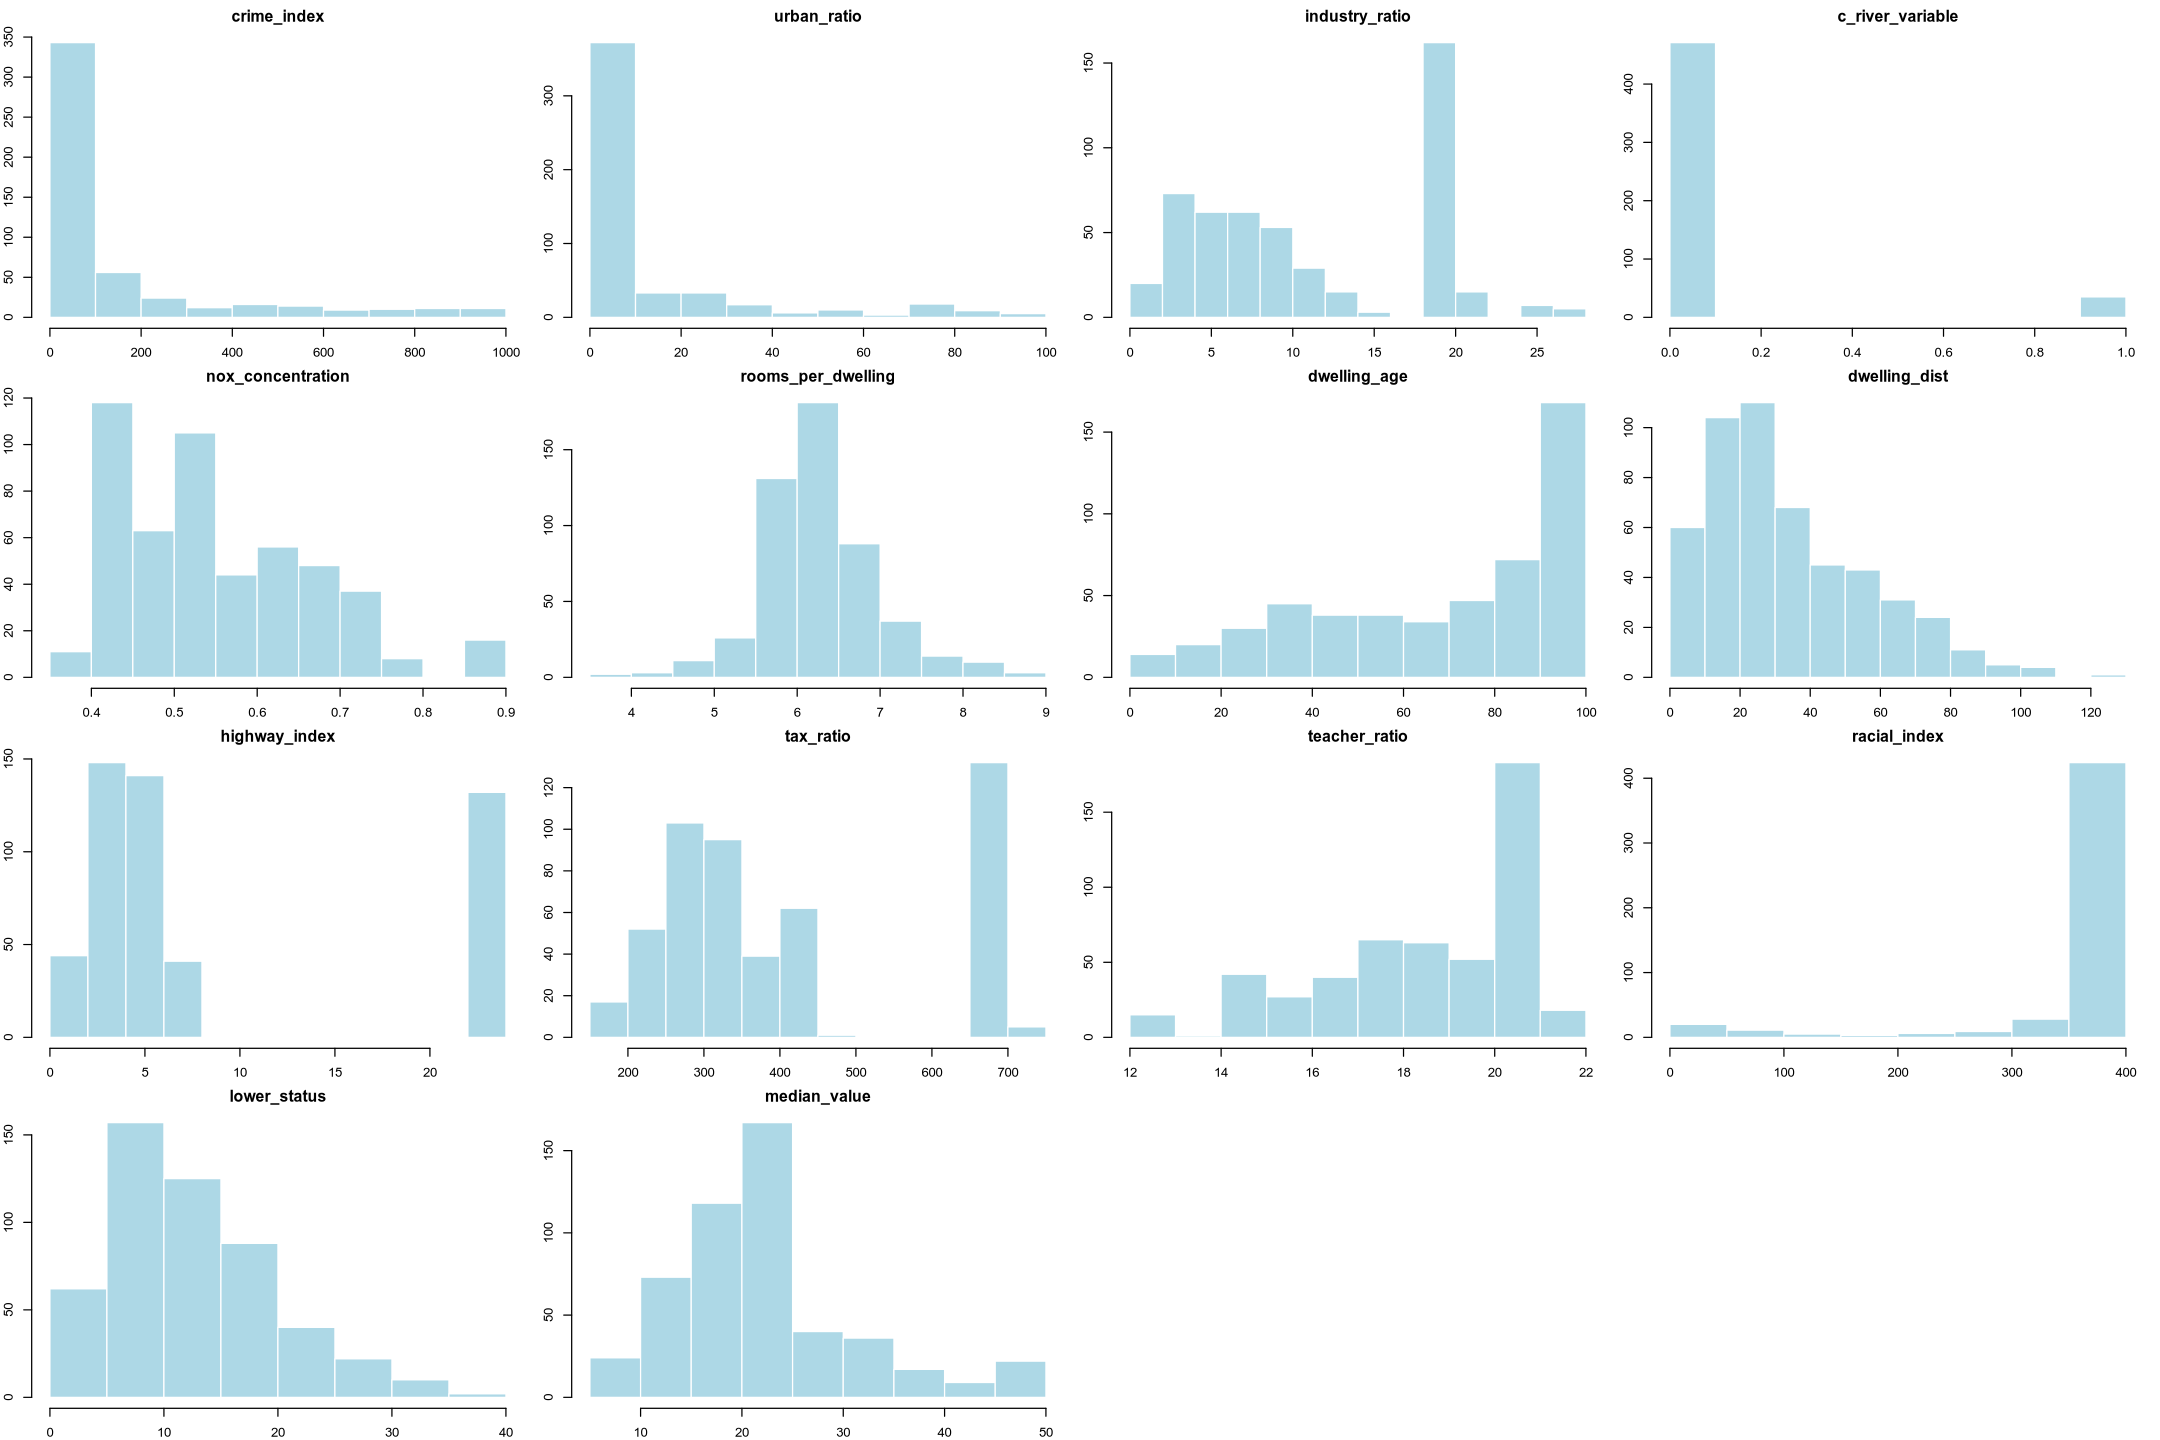

In [8]:
datos_num <- data_boston[sapply(data_boston, is.numeric)]

par(mfrow = c(4, 4))
par(mar = c(2, 2, 2, 1))

for (i in seq_len(ncol(datos_num))) {
  hist(datos_num[, i],
    main = names(datos_num)[i],
    xlab = "",
    col = "lightblue",
    border = "white"
  )
}

par(mfrow = c(1, 1))

#### Análisis de los Histogramas

Tras el análisis estadístico descriptivo, los histogramas nos permiten validar visualmente las anomalías detectadas (escalas y sesgos) y descubrir patrones estructurales (bimodalidad) que los simples números no revelaban.

##### Confirmación Visual de Anomalías y Escalas
Los gráficos corroboran las inconsistencias detectadas en la fase de `summary`, señalando la urgencia del preprocesamiento:

* `crime_index` (Índice de criminalidad):
    * Se confirma una distribución en forma de "L" con una asimetría positiva extrema. La inmensa mayoría de los datos se concentran en la primera barra (cerca de 0), mientras una cola muy fina se extiende hasta valores de 1000.
    * La visualización ratifica que la media está rota por outliers. Es imperativo aplicar una transformación logarítmica (`log(x)`) para comprimir la cola derecha y normalizar la distribución antes del modelado.

* `dwelling_dist` (Distancia a centros):
    * La cola de la distribución se extiende hasta el valor 120.
    * Esto valida visualmente el error de escala hipotetizado anteriormente. En el contexto de Boston, distancias de 120 millas no tienen sentido frente a la media de las otras variables.
    * Se procederá a dividir la variable por 10 para ajustar su rango a [1-12].

* `urban_ratio` (Ratio zona urbana):
    * Se observa una "inflación de ceros" masiva; la barra en el valor 0 domina totalmente el gráfico.
    * Matemáticamente es una variable difícil de transformar hacia la normalidad debido a esta concentración en un valor único. Se evaluará su utilidad en el Análisis de Factores.

##### Detección de Patrones Estructurales (Bimodalidad)
Los histogramas revelan estructuras latentes en los datos que sugieren la existencia de subgrupos en la ciudad:

* `industry_ratio` y `tax_ratio`:
    * Ambas presentan distribuciones bimodales (dos picos claramente separados). En `tax_ratio`, por ejemplo, hay un grupo de valores bajos (200-400) y un pico aislado en valores altos (600-700).
    * Esto sugiere la existencia de dos tipos de zonas bien diferenciadas en Boston: suburbios puramente residenciales (bajos impuestos/poca industria) frente a zonas mixtas o céntricas. Esta polarización es información valiosa para el análisis, aunque las variables no sean normales.

* `highway_index` (Accesibilidad):
    * El gráfico no muestra una curva continua, sino barras aisladas con un salto enorme entre los valores bajos (1-8) y el bloque final (24).
    * Confirma visualmente que, a efectos prácticos, actúa como una variable categórica/ordinal y no lineal.

##### Variables con Comportamiento "Casi" Normal
Estas variables son las mejores candidatas para modelos lineales sin necesidad de grandes transformaciones:

* `rooms_per_dwelling`: Muestra una campana de Gauss muy limpia centrada en 6 habitaciones. Es la variable con mejor comportamiento estadístico natural.
* `nox_concentration`: Aunque presenta cierta asimetría positiva, su dispersión es razonable.
* `median_value` (Target): Se asemeja a una normal, pero el histograma delata claramente el censurado de datos (efecto techo) con una barra artificialmente alta en el valor 50.00.

##### Otras Distribuciones Sesgadas
* `dwelling_age`: Fuerte asimetría negativa (hacia la izquierda), con una acumulación de frecuencias en el valor 100 (viviendas muy antiguas), lo que refuerza la teoría del *top-coding* (límite máximo artificial).
* `racial_index`: Extremadamente asimétrica a la izquierda (datos concentrados en 400).
* `lower_status`: Distribución similar a una Log-Normal, sugiriendo que una transformación logarítmica podría beneficiar su correlación con el precio.

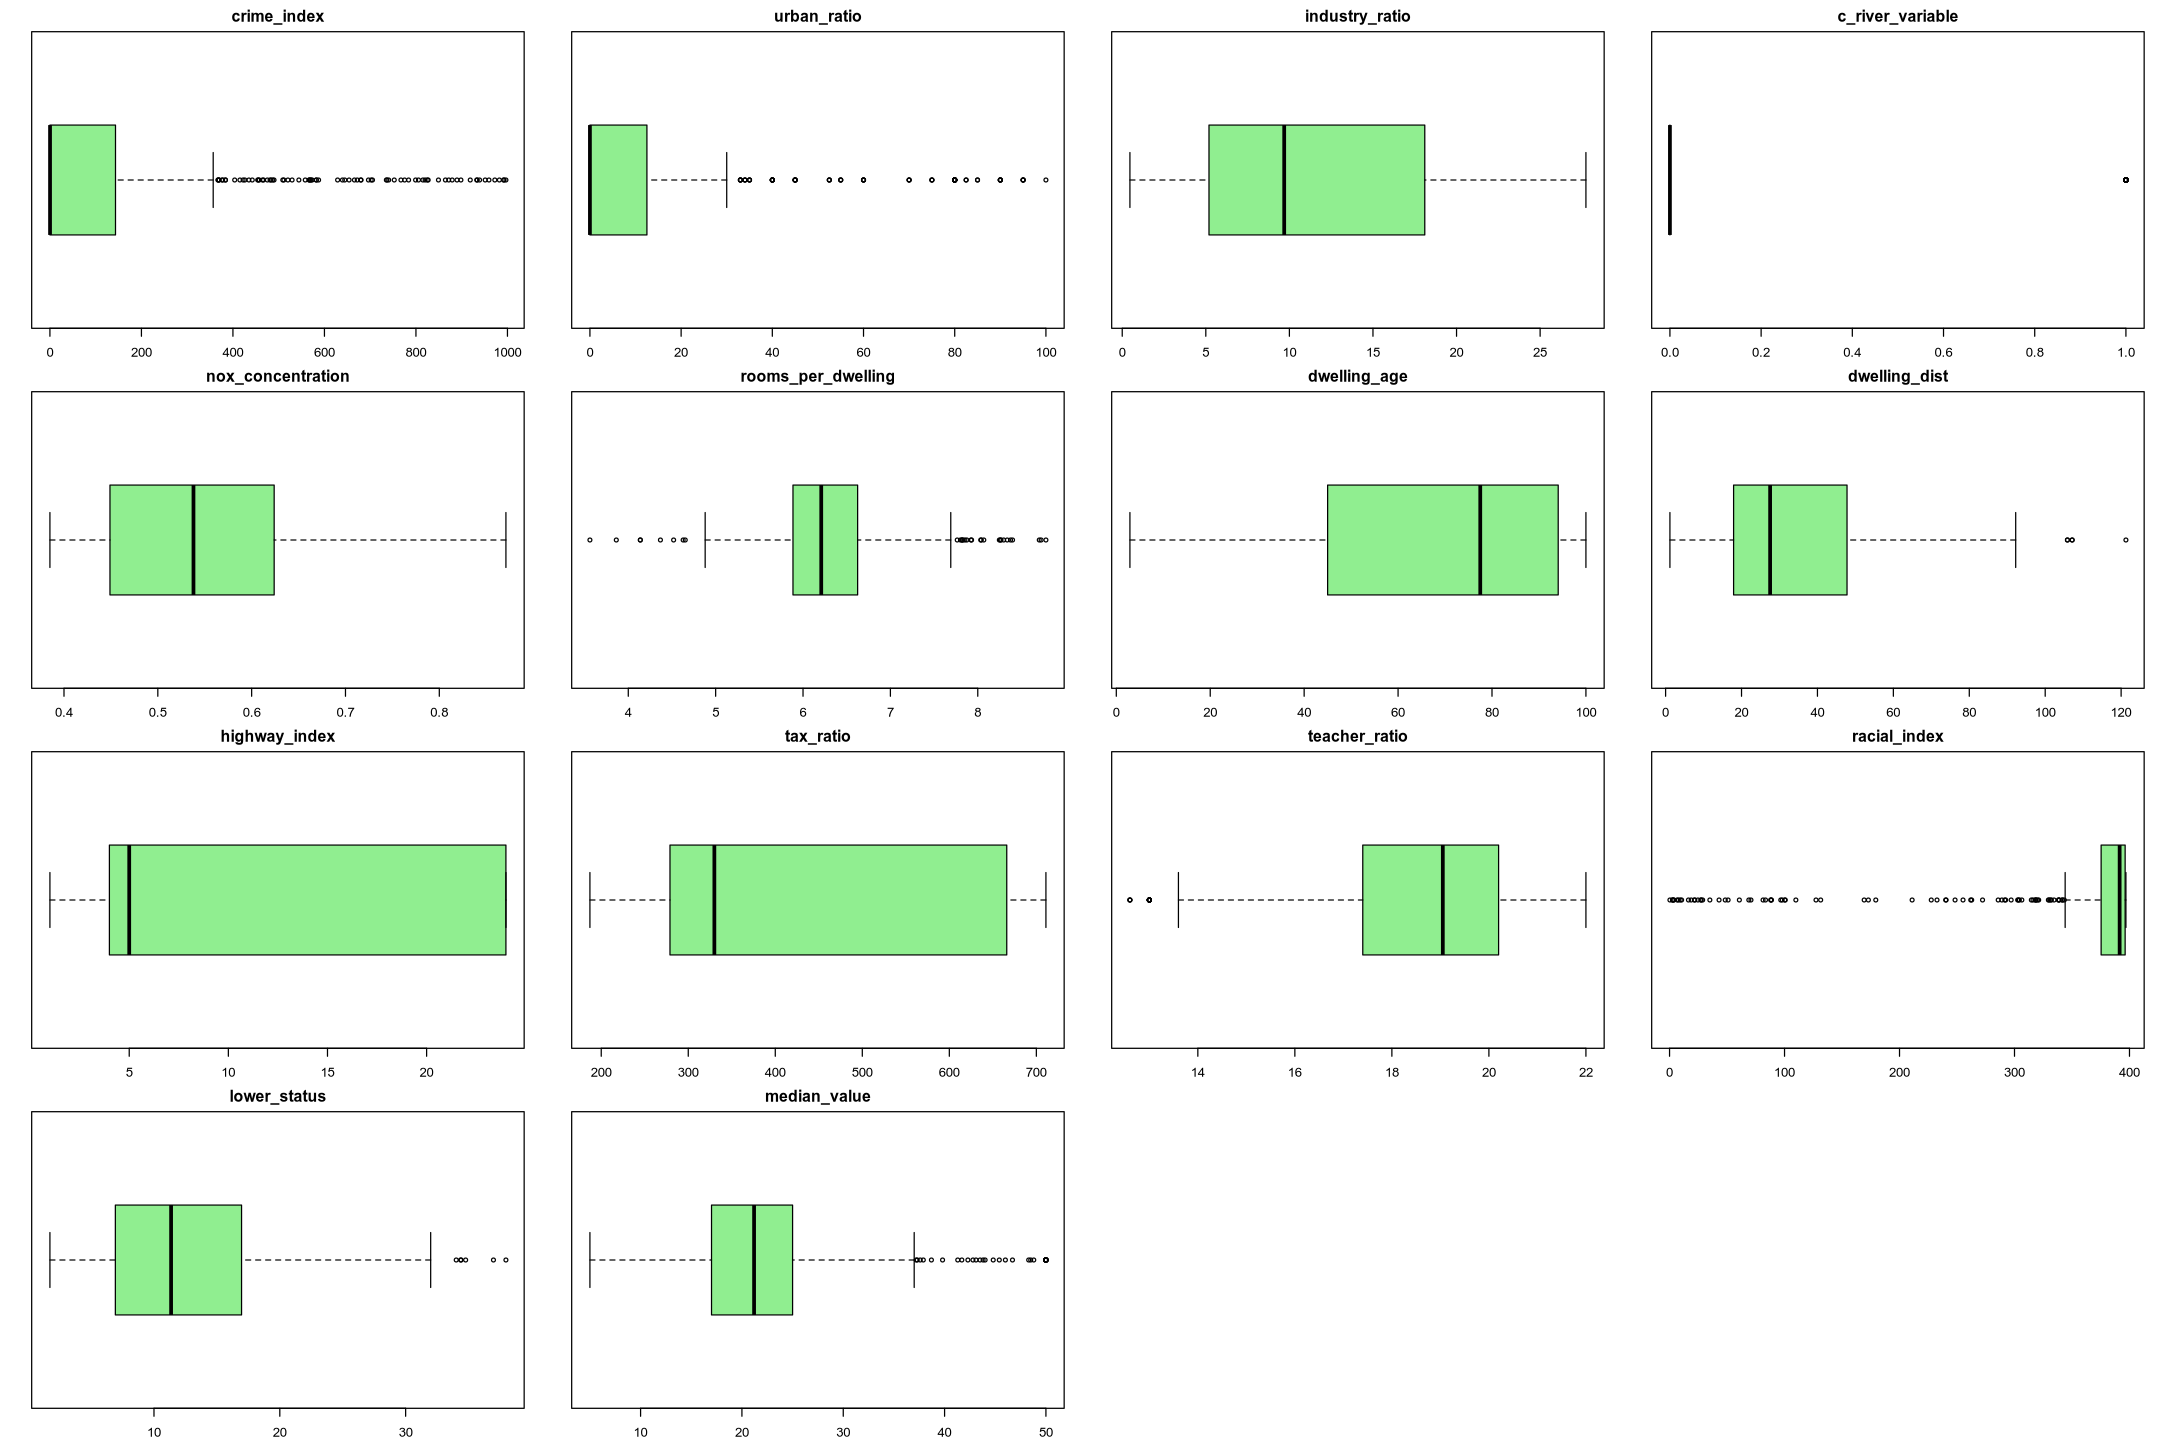

In [9]:
par(mfrow = c(4, 4))
par(mar = c(2, 2, 2, 1))

for (i in seq_len(ncol(datos_num))) {
  boxplot(datos_num[, i],
    main = names(datos_num)[i],
    col = "lightgreen",
    horizontal = TRUE
  )
}

par(mfrow = c(1, 1))

#### Análisis de Boxplots

Los diagramas de caja complementan la visión de los histogramas al exponer explícitamente la ubicación de la mediana y, crucialmente, la magnitud de los valores atípicos (*outliers*), permitiéndonos distinguir entre varianza natural y anomalías estructurales.

##### Confirmación de Asimetrías Severas
Los boxplots ratifican los problemas de distribución detectados anteriormente, mostrando gráficamente la severidad de los sesgos:

* `crime_index` (Criminalidad):
    * La "caja" (Rango Intercuartílico) está colapsada contra el cero, mientras que los bigotes y puntos revelan una cantidad masiva de outliers positivos.
    * Esto valida que la media de 131.69 es un artefacto estadístico provocado por estos valores extremos. La transformación logarítmica es, sin duda, la única vía para estabilizar esta varianza.

* `racial_index` y `urban_ratio`:
    * En `racial_index`, observamos la estructura inversa al crimen: la masa de datos se concentra en el valor máximo (400) con una larga cola de outliers hacia la izquierda (asimetría negativa).
    * En `urban_ratio`, el hecho de que la mediana se sitúe en 0 confirma la "inflación de ceros"; la mayoría de las zonas no tienen calificación urbana residencial, convirtiendo cualquier valor positivo técnicamente en una desviación de la norma.

##### Validación del Error de Escala
* `dwelling_dist`: Aunque la forma de la caja es saludable (indicando una distribución subyacente razonable), el eje X delata el error. Ver valores atípicos situados en 100-120 confirma que la variable no está en millas estándar (como sugería el máximo teórico de ~12), sino multiplicada por 10. La corrección aritmética es obligatoria.

##### Comportamiento de Variables "Sanas" vs. Bimodales
* `rooms_per_dwelling`: El boxplot muestra una simetría ejemplar centrada en ~6. Los outliers presentes en ambos extremos son equilibrados y representan variabilidad natural del mercado (casas muy pequeñas o mansiones), por lo que no deben ser eliminados.
* `industry_ratio`: Aquí el gráfico es engañoso. Muestra una caja ancha y sólida, lo cual podría interpretarse como una distribución uniforme. Sin embargo, sabemos por el histograma que esta variable es bimodal (dos picos). El boxplot oculta esa polarización, recordándonos que esta variable describe dos tipos de zonas distintas (residencial vs industrial) mezcladas en una sola métrica.

##### Detección de Censura y Discontinuidades
* `median_value` (Target): El boxplot revela una línea sólida de puntos estancados en el valor 50.00. Esto es la prueba gráfica de la censura de datos (top-coding): el mercado real seguía subiendo, pero los datos se truncaron artificialmente.
* `highway_index`: Se observa una caja que abarca del 5 al 24. Dado que sabemos que no existen valores intermedios entre 8 y 24, el boxplot está interpolando visualmente un espacio vacío. Esto refuerza la decisión de no tratarla como una variable lineal continua, sino evaluar su discretización (Alta vs Baja accesibilidad).

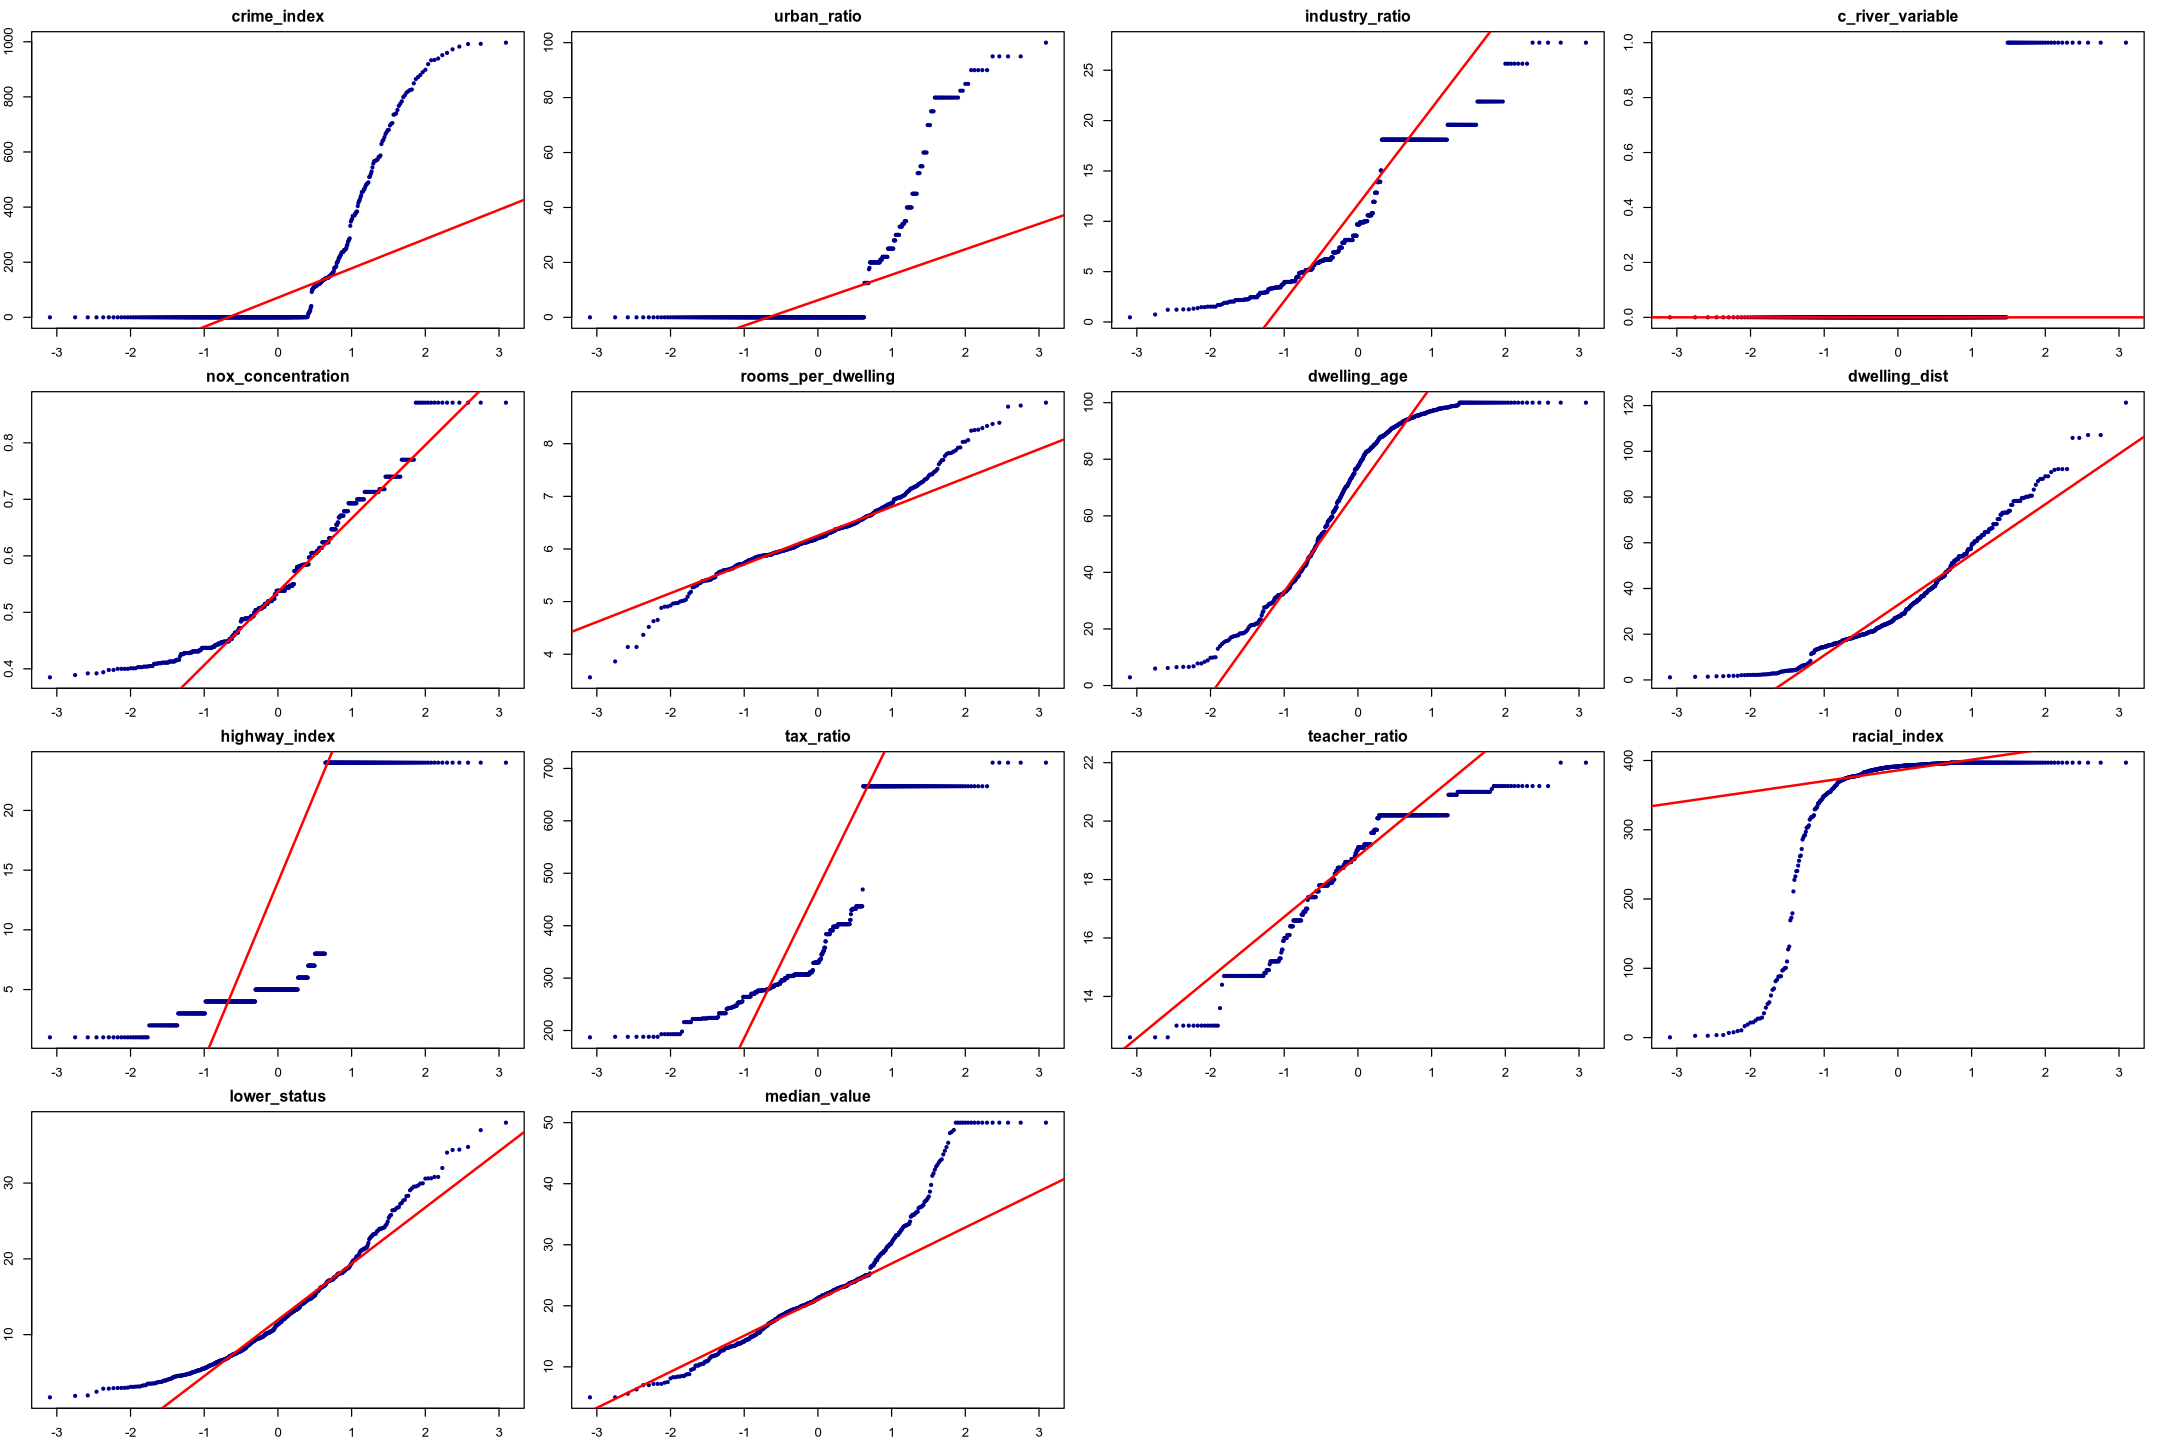

In [10]:
datos_num <- data_boston[sapply(data_boston, is.numeric)]

par(mfrow = c(4, 4))
par(mar = c(2, 2, 2, 1))

for (i in seq_len(ncol(datos_num))) {
  qqnorm(datos_num[, i],
    main = names(datos_num)[i],
    pch = 19,
    col = "darkblue",
    cex = 0.5
  )
  qqline(datos_num[, i], col = "red", lwd = 2)
}

par(mfrow = c(1, 1))

#### Análisis de Q-Q Plots y Normalidad

Los gráficos Q-Q proporcionan la prueba visual definitiva para contrastar la normalidad teórica frente a la distribución real de nuestras variables. Si los datos fuesen perfectamente normales (Gaussianos), los puntos azules deberían alinearse estrictamente sobre la línea roja de referencia.

##### 1. Desviaciones Críticas de la Normalidad
La visualización confirma que la mayoría de las variables originales violan el supuesto de normalidad. Esto es crítico porque técnicas como el PCA son sensibles a la varianza y a los *outliers*, y pueden identificar componentes erróneos si las distribuciones están muy sesgadas:

* `crime_index`: La curva se aleja violentamente de la línea roja, volviéndose casi vertical. Esto ratifica la distribución exponencial/log-normal detectada en el histograma. Sin transformación, esta variable tiene tal varianza en la cola que dominaría artificialmente el análisis.
* `lower_status` y `dwelling_dist`: Muestran una curvatura sistemática (forma de "banana" o "J") típica de distribuciones con asimetría positiva. Los puntos "cuelgan" por debajo de la línea y luego la cruzan hacia arriba, indicando que un modelo lineal subestimará sistemáticamente los valores extremos si no se aplica una corrección logarítmica.
* `dwelling_age`: La desviación es evidente en el extremo superior derecho, donde los puntos forman una meseta horizontal. Esto es la huella digital del *top-coding* (censura en 100 años), confirmando visualmente que la variable pierde su linealidad al llegar a su límite máximo.

##### 2. Variables con Comportamiento Aceptable
* `rooms_per_dwelling`: Es la variable que mejor se ajusta a la diagonal roja, especialmente en el rango central. Las desviaciones en los extremos (las colas) son simétricas y moderadas, lo que confirma su robustez y su idoneidad como predictor lineal primario sin necesidad de transformaciones agresivas.
* `median_value`: Aunque el cuerpo central de los datos sigue la normalidad razonablemente bien, el gráfico Q-Q revela una línea horizontal abrupta en el extremo derecho superior. Esto es la confirmación visual irrefutable de la censura de datos en el valor 50k: el modelo teórico predice que debería haber casas más caras, pero los datos reales se topan con un techo artificial.

##### Conclusión sobre Normalidad
> Los Q-Q Plots demuestran que trabajar con las variables en bruto introduciría sesgos significativos. La falta de alineación en variables clave como `crime_index` y `lower_status` hace obligatorio el uso de transformaciones no lineales (logaritmos) para "enderezar" estas relaciones y estabilizar la varianza antes de proceder al Análisis de Componentes Principales y la Regresión.

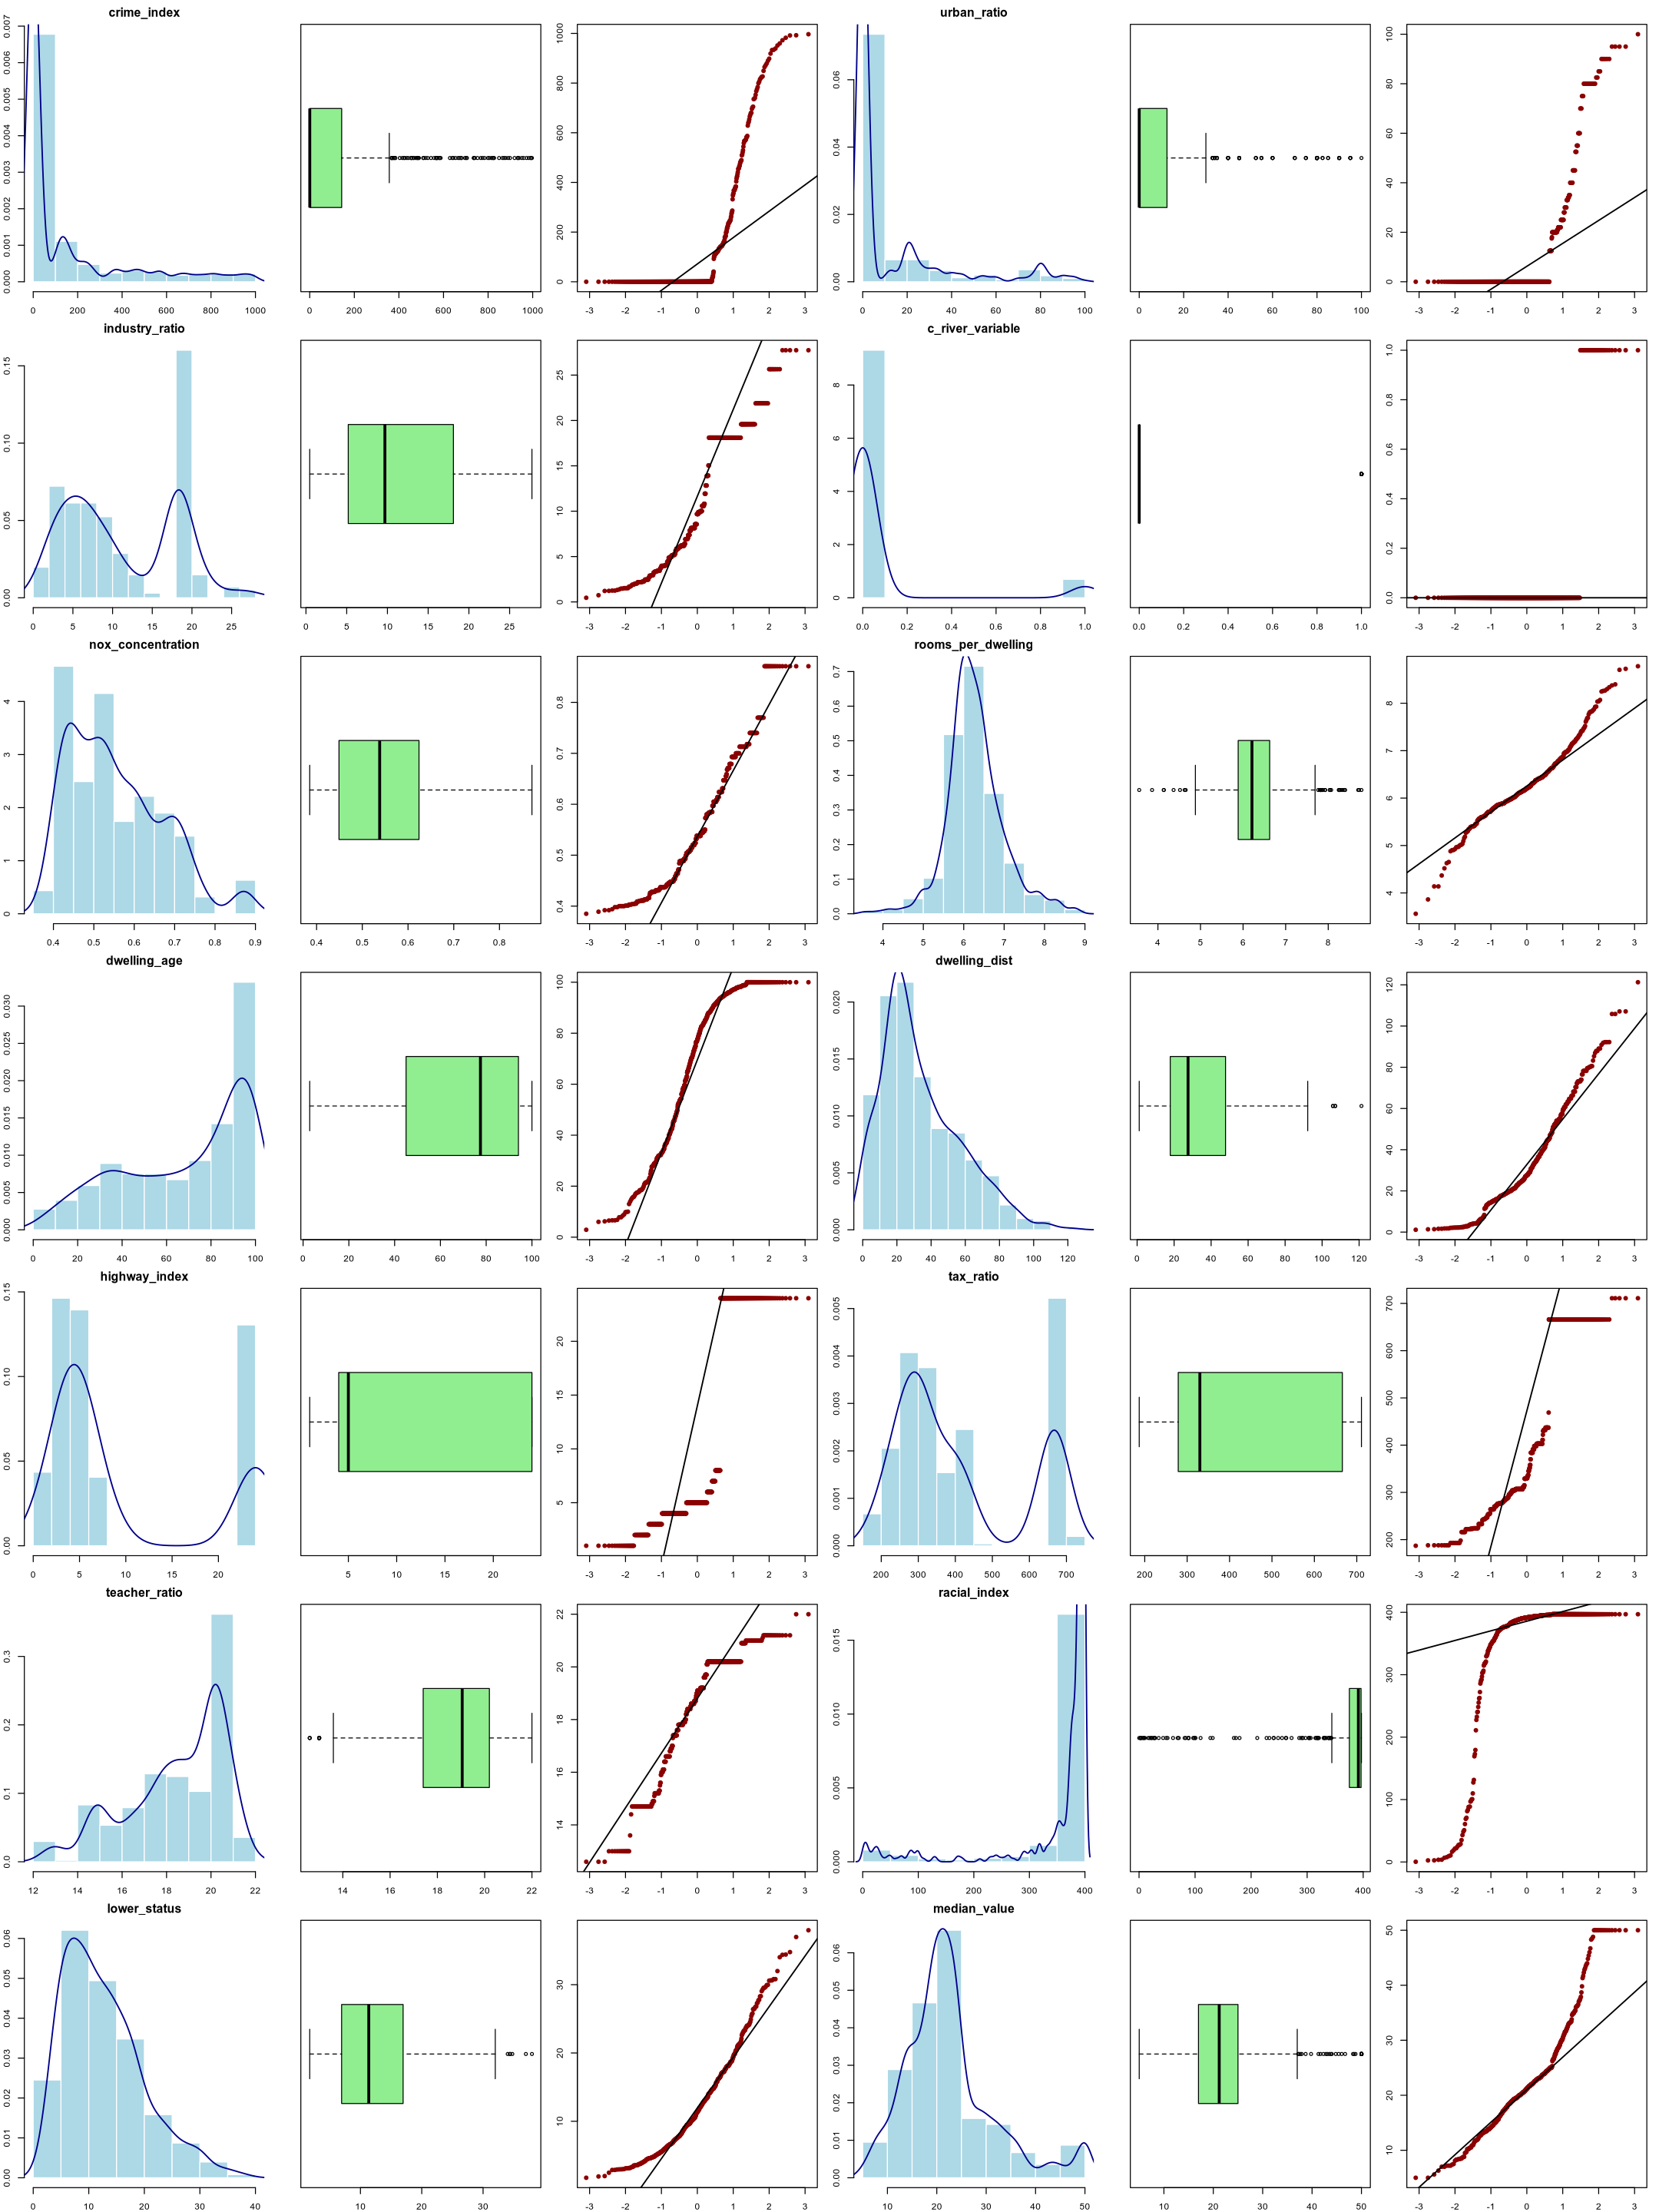

In [11]:
options(repr.plot.width = 18, repr.plot.height = 24)

datos_num <- data_boston[sapply(data_boston, is.numeric)]
n_vars <- ncol(datos_num)

par(mfrow = c(7, 6))

par(mar = c(2, 2, 2, 1))
par(cex.main = 1.2, cex.axis = 0.9)

for (i in seq_len(n_vars)) {
  var_data <- datos_num[, i]
  var_name <- names(datos_num)[i]

  hist(var_data,
    main = var_name,
    xlab = "",
    col = "lightblue",
    border = "white",
    freq = FALSE
  )
  try(lines(density(var_data, na.rm = TRUE),
    col = "darkblue", lwd = 1.5
  ), silent = TRUE)

  boxplot(var_data,
    main = "",
    horizontal = TRUE,
    col = "lightgreen",
    notch = FALSE
  )

  qqnorm(var_data,
    main = "",
    col = "darkred",
    pch = 19,
    cex = 0.8
  )
  qqline(var_data, col = "black", lwd = 1.5)
}

par(mfrow = c(1, 1))
options(repr.plot.width = 18, repr.plot.height = 12)

### <font color='#3d59c6'> Transformaciones y conversion de variables categóricas</font>

El análisis exploratorio reveló la necesidad de intervenir en ciertas variables para garantizar la robustez de los análisis multivariados posteriores (como PCA y ANOVA). A continuación, se detallan y justifican las transformaciones aplicadas para corregir problemas de escala, distribución e interpretabilidad.

#### Corrección de Escala: `dwelling_dist`

La variable original presentaba un rango de valores (hasta 121) inconsistente con la magnitud física esperada (distancia en millas).

  * Transformación: División de la variable por 10.
  * Recuperar una escala métrica coherente evita que esta variable domine artificialmente la varianza en el PCA solo por su magnitud numérica, garantizando una comparabilidad real con el resto de predictores.

#### Estabilización de la Varianza: `crime_index`

La distribución del índice de criminalidad mostraba una asimetría positiva extrema, con una media muy alejada de la mediana debido a valores atípicos severos.

  * Transformación: Aplicación del logaritmo natural (`log`).
  * Esta operación comprime la cola derecha de la distribución, reduciendo drásticamente la influencia de los outliers y mejorando la linealidad de la variable, un requisito clave para detectar patrones de correlación.

#### Normalización de Distribución: `lower_status`

Al igual que el crimen, el porcentaje de población de bajo estatus presentaba una asimetría positiva que podría sesgar los modelos lineales.

  * Transformación: Aplicación del logaritmo.
  * Reduce la dispersión y aproxima la distribución a una normal, facilitando que el PCA capture la varianza estructural en lugar de ruido estadístico.

#### Tratamiento de Datos Censurados: `dwelling_age`

Se detectó un "efecto techo" (*top-coding*) en la edad de las viviendas, con una gran acumulación de observaciones en el valor máximo (100 años).

  * Transformación: Raíz cuadrada de la edad invertida (`sqrt(100 - dwelling_age)`).
  * Esta transformación expande el rango de los valores más altos, permitiendo diferenciar mejor entre las viviendas antiguas y mitigando la saturación de la distribución en el límite superior.

#### Codificación de Variables Categóricas

Variables como `highway_index` (índice de accesibilidad) y `c_river_variable` (adyacencia al río) son numéricas en su registro, pero cualitativas en su naturaleza.

  * Acción: Conversión a factores (variables categóricas).
  * Estos valores no representan magnitudes continuas lineales. Tratarlos como factores evita que los algoritmos asuman distancias métricas falsas (ej. que el índice 24 es "el triple" que el 8) y permite realizar comparaciones de medias (ANOVA) entre grupos bien definidos.

### Estrategia de Preprocesamiento y Transformación de Variables

Para garantizar la integridad de los datos y la compatibilidad con los diferentes modelos estadísticos que aplicaremos (PCA y ANOVA), se ha adoptado la siguiente estrategia de codificación:

#### 1. Preservación de Datos Originales (Seguridad):
En lugar de sobrescribir las variables originales, generaremos nuevas columnas con sufijos explicativos (ej: `_log`, `_trans`).
* Esto permite comparar en cualquier momento la distribución original frente a la transformada y asegura que, en caso de error, la variable base (`crime_index`, `lower_status`) permanece intacta para su consulta.

#### 2. Dualidad Numérica/Categórica (Compatibilidad PCA vs. ANOVA):
Algunas variables como `highway_index` (índice de accesibilidad radial) tienen una naturaleza dual. Son numéricas en su registro, pero categóricas en su comportamiento.
* Para el PCA (Punto 2): Necesitamos mantener la versión numérica original (`highway_index`), ya que el Análisis de Componentes Principales requiere matrices numéricas para calcular correlaciones y varianzas. Convertirla a factor aquí rompería el algoritmo.
* Para el ANOVA (Punto 3) y Visualización: Necesitamos una versión categórica (`highway_index_cat`) para agrupar observaciones y comparar medias entre grupos.
* Crearemos copias explícitas de tipo factor (`_cat`), manteniendo la versión numérica original disponible para los algoritmos que la requieran.

In [12]:
df_clean <- data_boston

df_clean$dwelling_dist <- df_clean$dwelling_dist / 10
df_clean$crime_index_log <- log(df_clean$crime_index)
df_clean$lower_status_log <- log(df_clean$lower_status)
df_clean$dwelling_age_trans <- sqrt(101 - df_clean$dwelling_age)
df_clean$highway_index_cat <- as.factor(df_clean$highway_index)

df_clean$c_river_variable_cat <- factor(
  df_clean$c_river_variable,
  levels = c(0, 1),
  labels = c("No", "Si")
)

df_clean$accesibilidad_radial <- ifelse(df_clean$highway_index == 24,
  "Alta", "Baja_Media"
)
df_clean$accesibilidad_radial <- as.factor(df_clean$accesibilidad_radial)

summary(df_clean[, c(
  "dwelling_dist", "crime_index_log",
  "lower_status_log",
  "dwelling_age_trans", "highway_index_cat", "c_river_variable_cat"
)])

 dwelling_dist     crime_index_log   lower_status_log dwelling_age_trans
 Min.   : 0.1137   Min.   :-5.0640   Min.   :0.5481   Min.   :1.000     
 1st Qu.: 1.7930   1st Qu.:-2.5005   1st Qu.:1.9387   1st Qu.:2.632     
 Median : 2.7533   Median :-1.3606   Median :2.4301   Median :4.848     
 Mean   : 3.3837   Mean   : 0.5028   Mean   :2.3710   Mean   :5.029     
 3rd Qu.: 4.7648   3rd Qu.: 4.9652   3rd Qu.:2.8306   3rd Qu.:7.482     
 Max.   :12.1265   Max.   : 6.9044   Max.   :3.6368   Max.   :9.905     
                                                                        
 highway_index_cat c_river_variable_cat
 24     :132       No:471              
 5      :115       Si: 35              
 4      :110                           
 3      : 38                           
 6      : 26                           
 2      : 24                           
 (Other): 61                           

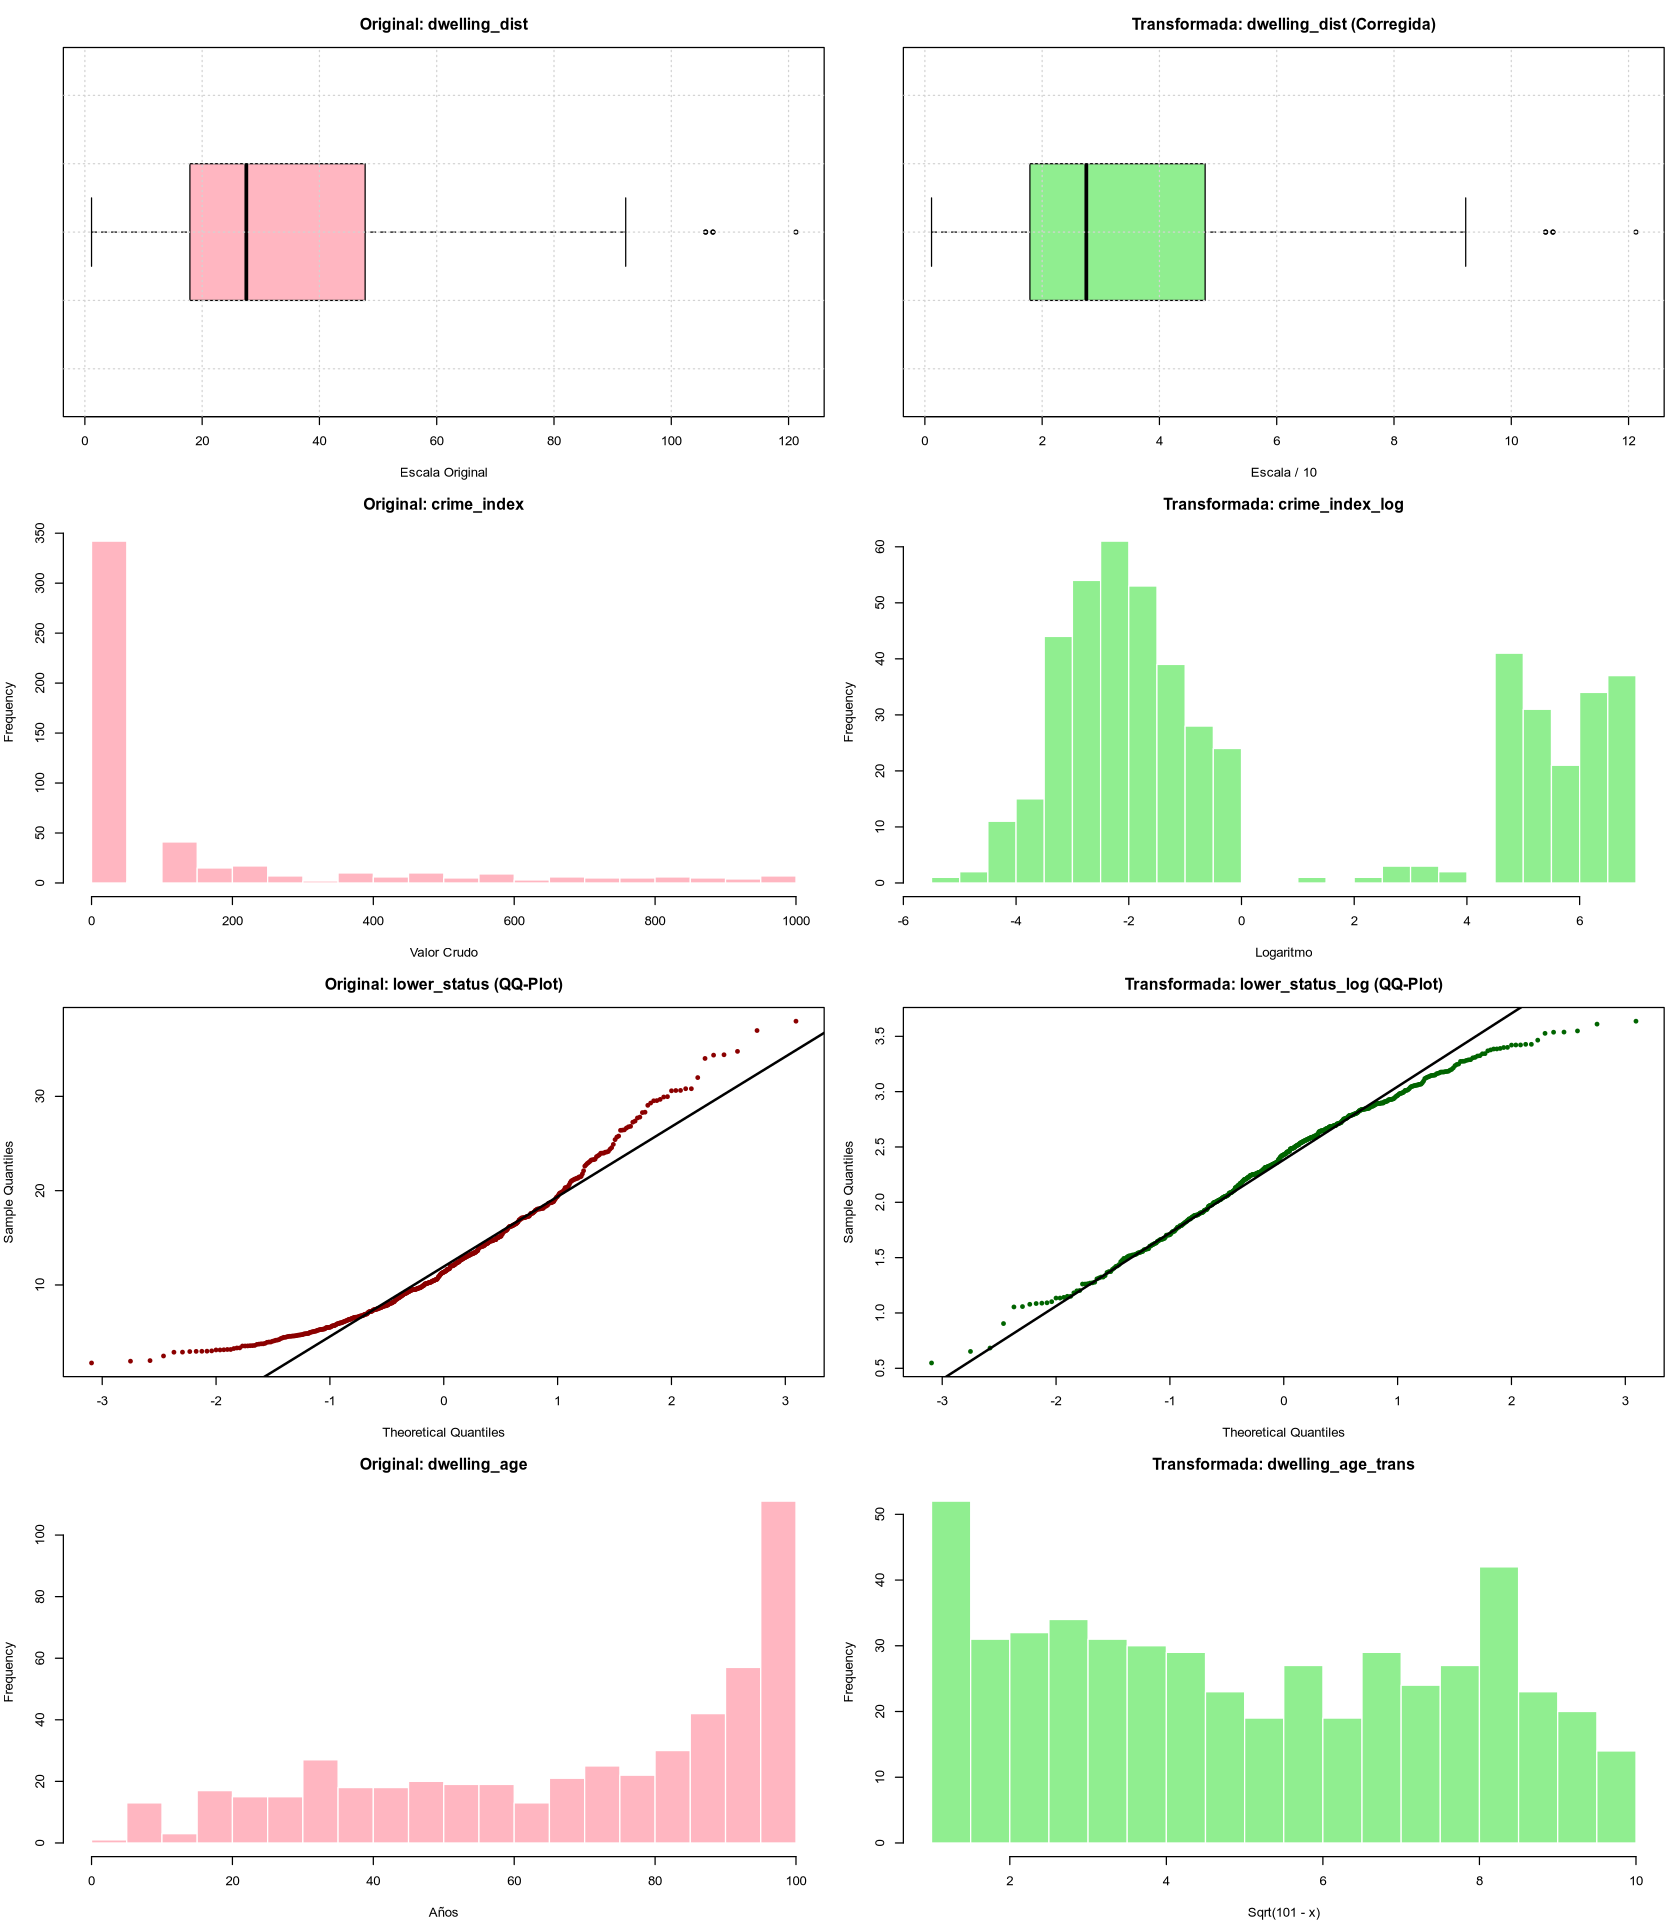

In [13]:
options(repr.plot.width = 14, repr.plot.height = 16)
par(mfrow = c(4, 2), mar = c(4, 4, 3, 1))

boxplot(data_boston$dwelling_dist,
  main = "Original: dwelling_dist",
  horizontal = TRUE, col = "#FFB6C1", xlab = "Escala Original"
)
grid()

boxplot(df_clean$dwelling_dist,
  main = "Transformada: dwelling_dist (Corregida)",
  horizontal = TRUE, col = "#90EE90", xlab = "Escala / 10"
)
grid()

hist(data_boston$crime_index,
  main = "Original: crime_index",
  col = "#FFB6C1", border = "white", breaks = 30, xlab = "Valor Crudo"
)

hist(df_clean$crime_index_log,
  main = "Transformada: crime_index_log",
  col = "#90EE90", border = "white", breaks = 30, xlab = "Logaritmo"
)

qqnorm(data_boston$lower_status,
  main = "Original: lower_status (QQ-Plot)",
  col = "darkred", pch = 19, cex = 0.6
)
qqline(data_boston$lower_status, lwd = 2)

qqnorm(df_clean$lower_status_log,
  main = "Transformada: lower_status_log (QQ-Plot)",
  col = "darkgreen", pch = 19, cex = 0.6
)
qqline(df_clean$lower_status_log, lwd = 2)

hist(data_boston$dwelling_age,
  main = "Original: dwelling_age",
  col = "#FFB6C1", border = "white", breaks = 20, xlab = "Años"
)

hist(df_clean$dwelling_age_trans,
  main = "Transformada: dwelling_age_trans",
  col = "#90EE90", border = "white", breaks = 20, xlab = "Sqrt(101 - x)"
)

par(mfrow = c(1, 1))

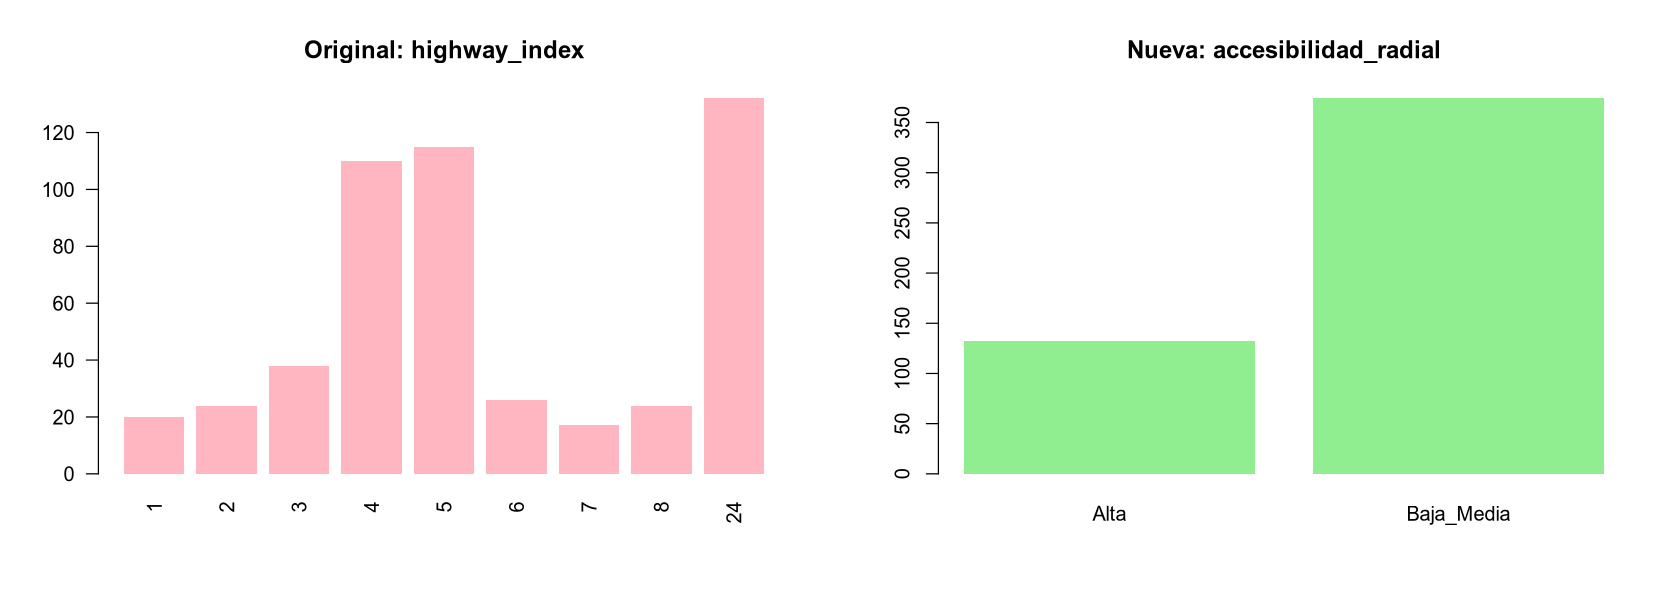

In [14]:
options(repr.plot.width = 14, repr.plot.height = 5)
par(mfrow = c(1, 2))

barplot(table(data_boston$highway_index),
  main = "Original: highway_index",
  col = "#FFB6C1", border = NA, las = 2
)

barplot(table(df_clean$accesibilidad_radial),
  main = "Nueva: accesibilidad_radial",
  col = "#90EE90", border = NA
)

par(mfrow = c(1, 1))

### Validación Integral de las Transformaciones

La efectividad de las transformaciones aplicadas ha sido validada mediante un análisis estadístico y visual comparativo ("Antes vs. Después"), que confirma la corrección de las anomalías estructurales detectadas. El dataset `df_clean` resultante presenta propiedades estadísticas robustas.

#### 1. Corrección de Escala: `dwelling_dist`
* La variable ha sido reescalada de un rango original incoherente (máximo de 121.26) a una métrica lógica con un máximo de 12.13. La media ajustada (3.38) se alinea ahora con el estándar de "millas a centros de empleo".
* **Boxplot:** El gráfico transformado muestra que los valores atípicos, que antes se disparaban hasta 120, ahora se contienen lógicamente dentro del rango [0-12]. Esta corrección elimina el riesgo de que la variable domine artificialmente la varianza total en el PCA debido únicamente a su magnitud escalar.

#### 2. Normalización y Simetría: Transformaciones Logarítmicas
Las transformaciones logarítmicas han demostrado ser altamente efectivas para estabilizar la varianza y corregir asimetrías positivas severas:

* **`crime_index_log`:**
    * El rango original (0 – 996) se ha comprimido a un intervalo manejable de -5.06 a 6.90. La reducción de la distancia entre la media (0.50) y la mediana (-1.36) indica una mejor centralización.
    * **Histograma:** La distribución original en forma de "L" (colapsada en cero) se ha desplegado en una curva **multimodal** amplia. Esto revela una estructura latente oculta: ahora podemos distinguir claramente entre zonas de criminalidad insignificante y zonas de riesgo medio/alto, eliminando el sesgo extremo.

* **`lower_status_log`:**
    * La transformación ha sido excepcionalmente exitosa, logrando que la media (2.37) y la mediana (2.43) sean prácticamente idénticas.
    * **Q-Q Plots:** La comparación es contundente. Mientras la variable original mostraba una curva convexa ("banana"), los puntos transformados se alinean casi perfectamente sobre la recta diagonal. Esto valida matemáticamente que `log(lower_status)` sigue una distribución normal.

#### 3. Tratamiento de Datos Censurados: `dwelling_age_trans`
* **Estrategia:** La transformación aplicada fue $\sqrt{101 - \text{age}}$.
* Esto ha **comprimido** el rango original (0-100) a un intervalo (1.00 – 9.90) e **invertido** la dirección de la variable (ahora valores bajos indican antigüedad extrema).
* **Histograma:** El gráfico verde muestra que la saturación de datos que antes estaba a la derecha (valor 100), ahora se sitúa a la izquierda (valor 1). Aunque la acumulación persiste (es inherente al dato censurado), la raíz cuadrada ha "suavizado" la caída de frecuencias hacia la derecha, reduciendo la agresividad de la asimetría original.

#### 4. Ingeniería de Variables Categóricas
El resumen de factores confirma una agrupación equilibrada y útil para el análisis:

* **`highway_index_cat`:** El `summary` revela el dominio de la categoría "24" (132 observaciones). La etiqueta automática `(Other): 61` agrupa correctamente los niveles minoritarios, simplificando la cardinalidad.
* **`accesibilidad_radial`:** La visualización de barras confirma la creación de una dicotomía clara. Al agrupar el índice 24 ("Alta") frente al resto ("Baja_Media"), hemos generado un predictor binario equilibrado que facilitará la interpretación en modelos ANOVA o de clasificación.
* **`c_river_variable_cat`:** La conversión a factor con etiquetas explícitas ("No": 471, "Si": 35) valida la correcta lectura de la variable *dummy* original.

> **Conclusión:**
> El preprocesamiento ha transformado un dataset con problemas severos de escala y distribución en un conjunto de datos robusto (`df_clean`). Las variables numéricas ahora poseen propiedades estadísticas (simetría, normalidad, escala comparable) que maximizarán la capacidad del PCA para capturar la varianza real.

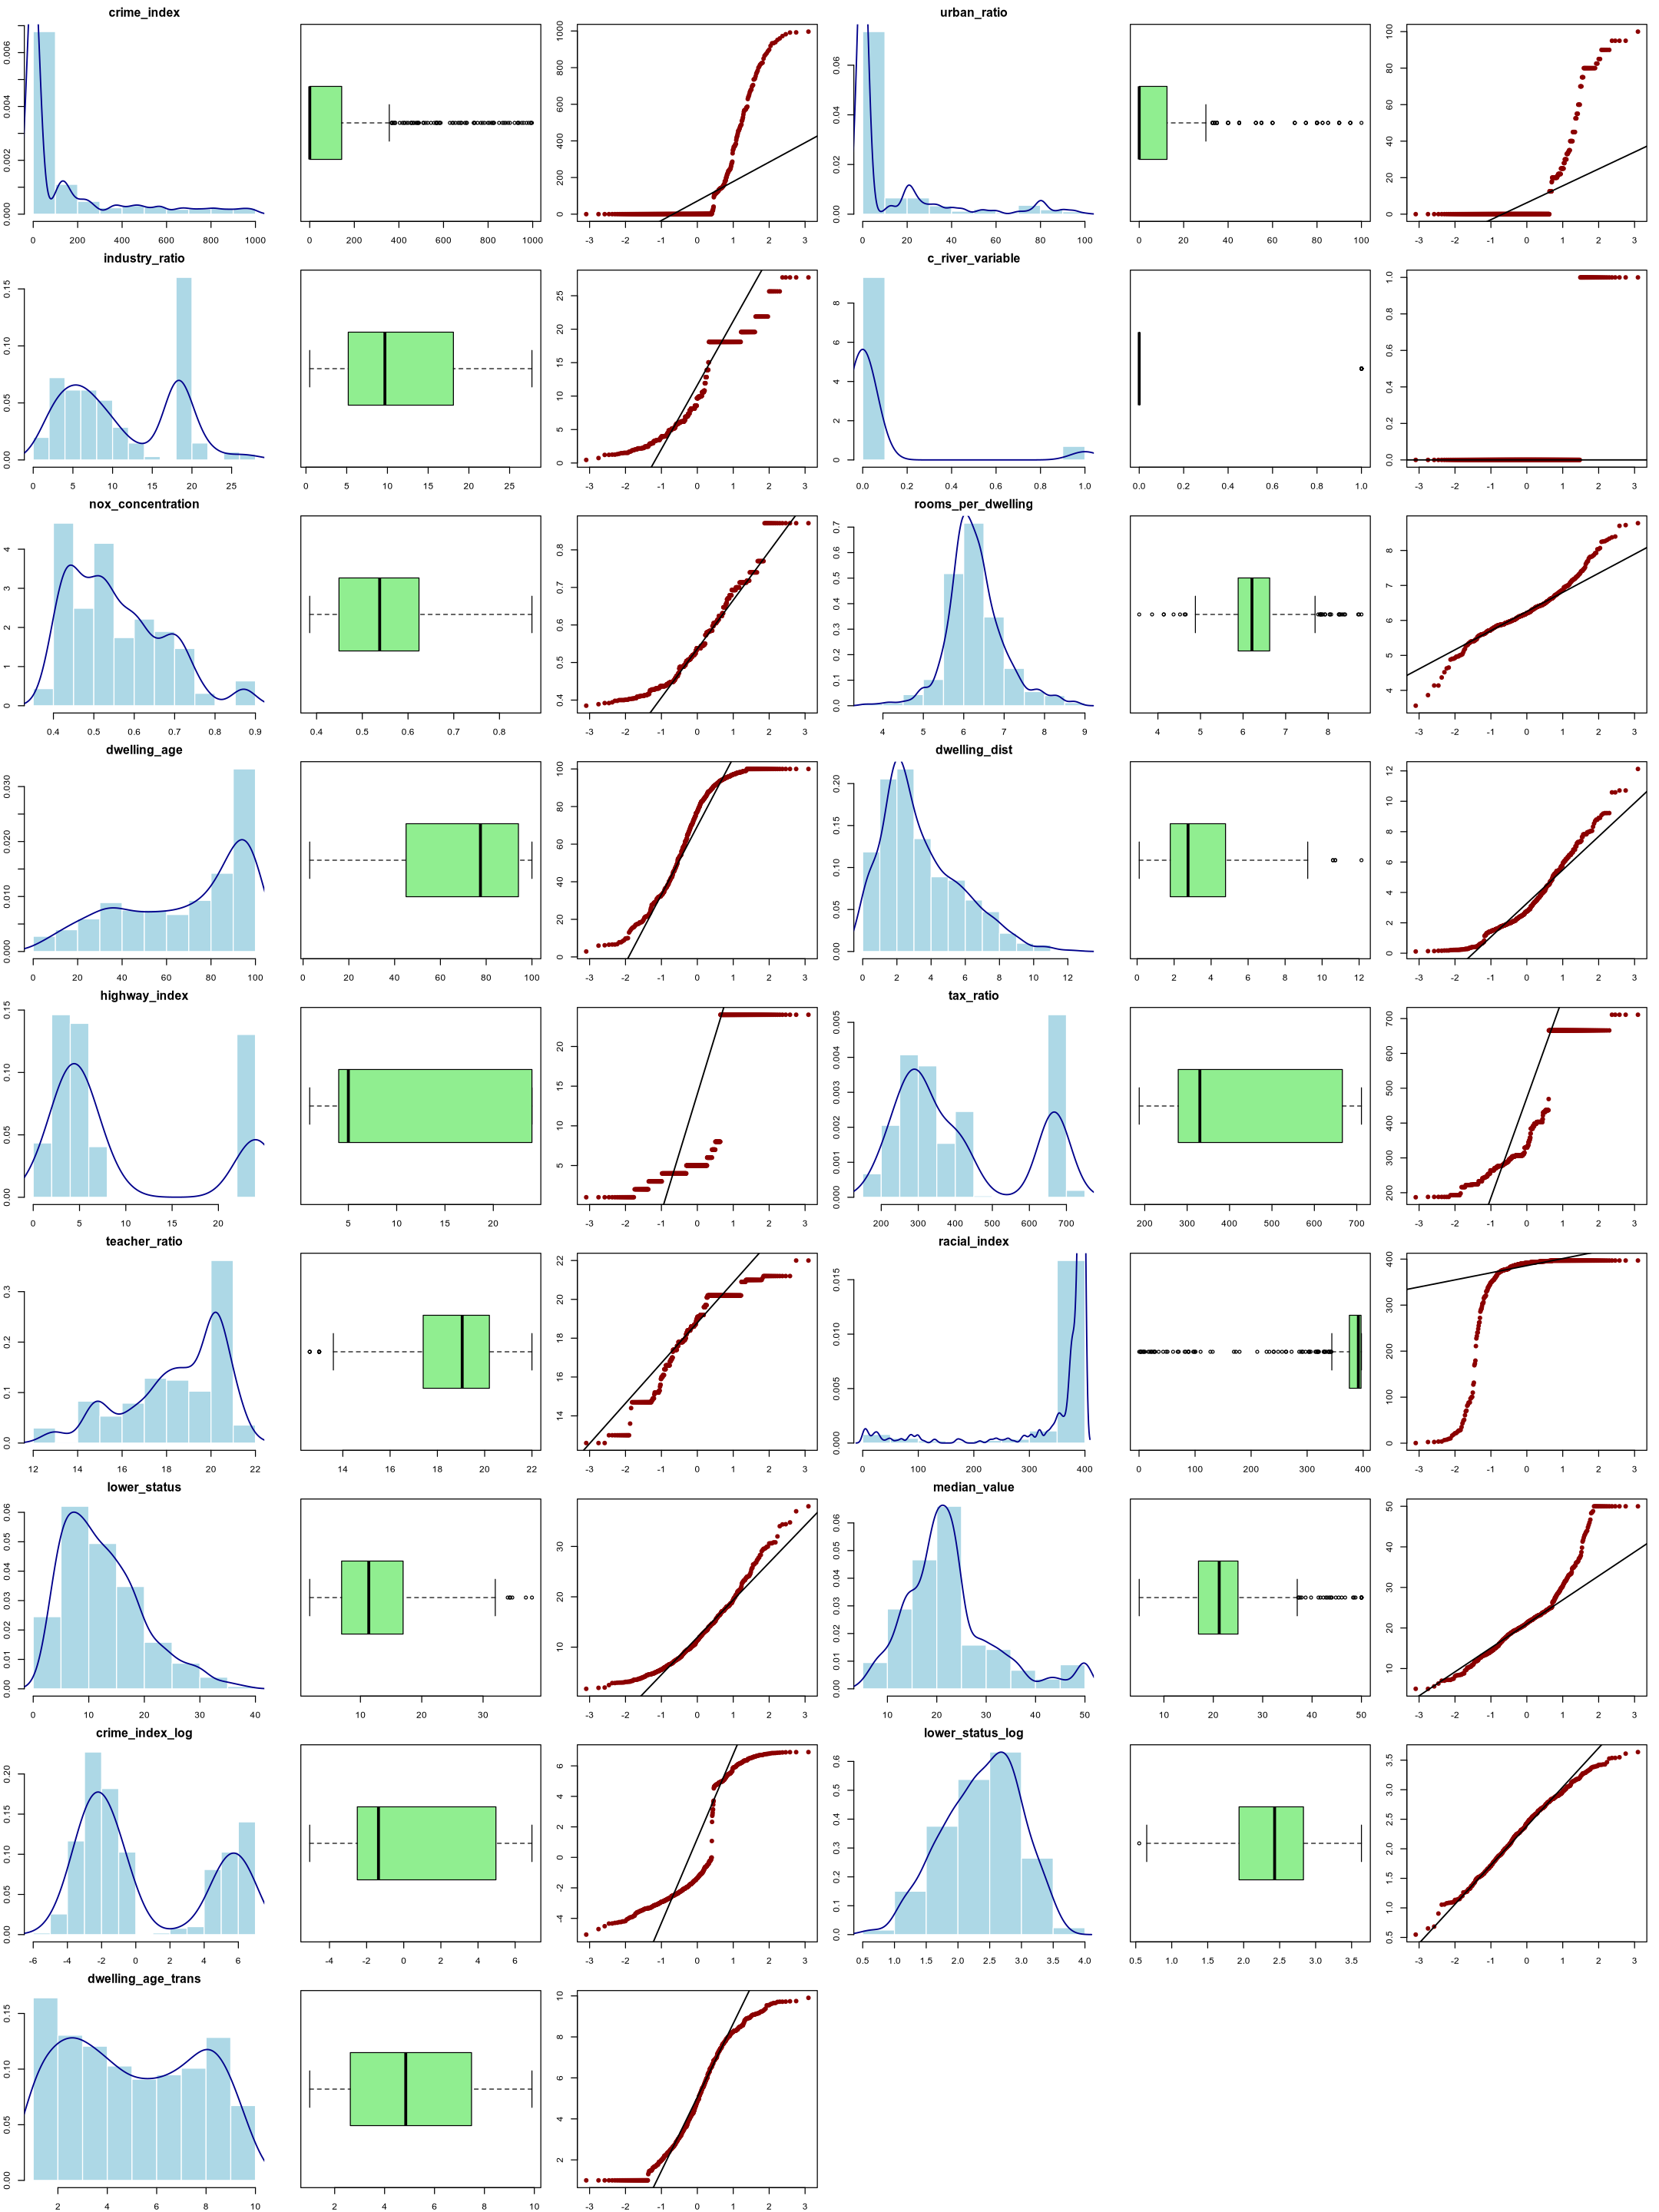

In [15]:
options(repr.plot.width = 18, repr.plot.height = 24)

datos_num_clean <- df_clean[sapply(df_clean, is.numeric)]
n_vars <- ncol(datos_num_clean)

par(mfrow = c(9, 6))
par(mar = c(2, 2, 2, 1))
par(cex.main = 1.2, cex.axis = 0.9)

for (i in seq_len(n_vars)) {
  var_data_clean <- datos_num_clean[, i]
  var_name_clean <- names(datos_num_clean)[i]

  hist(var_data_clean,
    main = var_name_clean,
    xlab = "",
    col = "lightblue",
    border = "white",
    freq = FALSE
  )
  try(lines(density(var_data_clean, na.rm = TRUE),
    col = "darkblue", lwd = 1.5
  ), silent = TRUE)

  boxplot(var_data_clean,
    main = "",
    horizontal = TRUE,
    col = "lightgreen",
    notch = FALSE
  )

  qqnorm(var_data_clean,
    main = "",
    col = "darkred",
    pch = 19,
    cex = 0.8
  )
  qqline(var_data_clean, col = "black", lwd = 1.5)
}

par(mfrow = c(1, 1))
options(repr.plot.width = 18, repr.plot.height = 12)

### <font color='#3d59c6'> Estandarización para PCA</font>

#### Preparación de Datos para el Análisis de Componentes Principales (PCA)

El Análisis de Componentes Principales es una técnica sensible a la escala de las variables. Si las variables tienen magnitudes muy diferentes (ej. `tax_ratio` en cientos vs `nox` en decimales), las variables con mayor varianza dominarán artificialmente el primer componente.

Para evitar esto y preparar los datos correctamente, realizamos los siguientes pasos:

1.  Se seleccionan exclusivamente las variables numéricas, utilizando las versiones transformadas en la fase anterior (logaritmos, correcciones de escala, etc.) para mejorar la linealidad. Se excluye la variable objetivo (`median_value`) para que el análisis de estructura no esté sesgado por el precio.
    * Incluimos `highway_index` en su formato numérico original para capturar su relación lineal, y añadimos `nox_concentration` y `teacher_ratio` por su relevancia teórica.

2.  Estandarización: Se aplica la función `scale()` para centrar todas las variables en media 0 y desviación estándar 1. Esto asegura que todas las variables contribuyan equitativamente al análisis, basándose en su correlación y no en su unidad de medida.

In [16]:
vars_pca <- c(
  "crime_index_log",
  "industry_ratio",
  "nox_concentration",
  "rooms_per_dwelling",
  "dwelling_age_trans",
  "dwelling_dist",
  "tax_ratio",
  "urban_ratio",
  "racial_index",
  "lower_status_log",
  "highway_index",
  "teacher_ratio"
)

In [17]:
data_pca <- scale(df_clean[, vars_pca])

str(data_pca)
print(dim(data_pca))

print("Medias por variable (Esperado: 0):")
print(round(colMeans(data_pca), 2))

print("Desviación Estándar por variable (Esperado: 1):")
print(apply(data_pca, 2, sd))

 num [1:506, 1:12] -1.456 -1.074 -1.074 -1.029 -0.831 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:12] "crime_index_log" "industry_ratio" "nox_concentration" "rooms_per_dwelling" ...
 - attr(*, "scaled:center")= Named num [1:12] 0.503 11.137 0.555 6.285 5.029 ...
  ..- attr(*, "names")= chr [1:12] "crime_index_log" "industry_ratio" "nox_concentration" "rooms_per_dwelling" ...
 - attr(*, "scaled:scale")= Named num [1:12] 3.822 6.86 0.116 0.703 2.673 ...
  ..- attr(*, "names")= chr [1:12] "crime_index_log" "industry_ratio" "nox_concentration" "rooms_per_dwelling" ...
[1] 506  12
[1] "Medias por variable (Esperado: 0):"
   crime_index_log     industry_ratio  nox_concentration rooms_per_dwelling 
                 0                  0                  0                  0 
dwelling_age_trans      dwelling_dist          tax_ratio        urban_ratio 
                 0                  0                  0                  0 
      racial_index   lower_status_log      high

#### Validación Técnica del Dataset para PCA

Se ha verificado la integridad estructural y las propiedades estadísticas de la matriz `data_pca` tras el proceso de estandarización. Los diagnósticos confirman que los datos cumplen rigurosamente los requisitos matemáticos para un Análisis de Componentes Principales:

1. Integridad Dimensional:

  * La matriz resultante conserva las 506 observaciones originales y reduce el espacio de atributos a 12 predictores numéricos.
  * Se confirma la exclusión de la variable objetivo (`median_value`) para garantizar un análisis no supervisado, así como de los factores categóricos que no poseen varianza numérica directa.

2. Homogenización de Escalas (Scaling):
El análisis descriptivo de las columnas transformadas valida el éxito de la función `scale()`:

  * Centrado (Media $\approx$ 0): Los vectores de medias son nulos. Esto indica que el hiperplano de proyección del PCA pasará exactamente por el centro de gravedad de la nube de datos.
  * Varianza Unitaria (SD = 1): Todas las variables presentan ahora una desviación estándar de 1.
      * Esto elimina el sesgo de magnitud (donde variables como `tax_ratio`, con valores de cientos, dominarían a `nox_concentration`, con valores decimales) y asegura que el PCA priorice las variables con mayor estructura de correlación, no las de mayor escala bruta.

>Conclusión:
>La matriz `data_pca` está correctamente estandarizada, libre de sesgos de escala y lista para la descomposición en vectores propios.

### <font color='#3d59c6'> Dataset para ANOVA</font>

#### Estructuración del Dataset para Análisis ANOVA

A diferencia del PCA, que trabaja exclusivamente con correlaciones numéricas, el Análisis de Varianza (ANOVA) requiere una estructura de datos mixta que combine una variable dependiente numérica (`median_value`) con variables independientes categóricas (factores) que definan los grupos a comparar.

Para facilitar este análisis y los modelos posteriores, construimos un nuevo dataframe consolidado `data_anova` que integra:

1.  La Variable Objetivo: El precio de la vivienda (`median_value`) en su escala original para mantener la interpretabilidad económica.
2.  Predictores Numéricos: Las versiones transformadas y corregidas de las variables continuas (ej. `crime_index_log`, `dwelling_dist`), listas para ser usadas como covariables si se decide realizar un ANCOVA o regresión.
3.  Factores Categóricos: Incorporamos explícitamente las versiones factorizadas de las variables cualitativas:
    * `highway_index` (convertida a factor para evaluar el impacto de cada autopista individualmente).
    * `accesibilidad` (variable derivada binaria Alta/Baja para contrastes más generales).
    * `c_river_variable` (factor No/Si para evaluar el "premium" por vista al río).

Esta estructura "limpia" permitirá ejecutar los tests de hipótesis de manera directa y ordenada.

In [18]:
data_anova <- data.frame(
  median_value = df_clean$median_value,
  crime_index_log = df_clean$crime_index_log,
  industry_ratio = df_clean$industry_ratio,
  rooms_per_dwelling = df_clean$rooms_per_dwelling,
  dwelling_age_trans = df_clean$dwelling_age_trans,
  dwelling_dist = df_clean$dwelling_dist,
  tax_ratio = df_clean$tax_ratio,
  urban_ratio = df_clean$urban_ratio,
  racial_index = df_clean$racial_index,
  lower_status_log = df_clean$lower_status_log,
  highway_index = df_clean$highway_index_cat,
  accesibilidad = df_clean$accesibilidad_radial,
  c_river_variable = df_clean$c_river_variable_cat
)

str(data_anova)
print(colSums(is.na(data_anova)))

'data.frame':	506 obs. of  13 variables:
 $ median_value      : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...
 $ crime_index_log   : num  -5.06 -3.6 -3.6 -3.43 -2.67 ...
 $ industry_ratio    : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ rooms_per_dwelling: num  6.58 6.42 7.18 7 7.15 ...
 $ dwelling_age_trans: num  5.98 4.7 6.32 7.43 6.84 ...
 $ dwelling_dist     : num  0.409 4.967 4.967 6.062 6.062 ...
 $ tax_ratio         : int  296 242 242 222 222 222 311 311 311 311 ...
 $ urban_ratio       : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ racial_index      : num  397 397 393 395 397 ...
 $ lower_status_log  : num  1.61 2.21 1.39 1.08 1.67 ...
 $ highway_index     : Factor w/ 9 levels "1","2","3","4",..: 1 2 2 3 3 3 5 5 5 5 ...
 $ accesibilidad     : Factor w/ 2 levels "Alta","Baja_Media": 2 2 2 2 2 2 2 2 2 2 ...
 $ c_river_variable  : Factor w/ 2 levels "No","Si": 1 1 1 1 1 1 1 1 1 1 ...
      median_value    crime_index_log     industry_ratio rooms_per_dw

#### Validación Técnica del Dataset para ANOVA (`data_anova`)

Se ha verificado la integridad y estructura del dataframe `data_anova`, confirmando que cumple con los requisitos necesarios para realizar un Análisis de Varianza robusto:

1.  Integridad de los Datos:
    * El conteo de valores nulos (`0` en todas las columnas) certifica que el dataset está completo y no presenta valores perdidos (*missing values*), eliminando el riesgo de sesgos por omisión o la necesidad de técnicas de imputación.
    * Se han conservado las 506 observaciones originales, asegurando que el análisis estadístico se realice sobre la totalidad de la muestra disponible.

2.  Tipología de Variables:
    * La función `str()` confirma la correcta asignación de tipos de datos, un paso crítico para el modelado en R:
        * Variable Dependiente: `median_value` se mantiene como numérica (`num`), preservando su escala original para una interpretación directa de los resultados económicos.
        * Covariables Numéricas: Las variables predictoras continuas (como `crime_index_log`, `dwelling_dist`) están correctamente tipificadas como numéricas (`num` o `int`), permitiendo su uso potencial en análisis de covarianza (ANCOVA).
        * Factores Categóricos: Las variables cualitativas `highway_index`, `accesibilidad` y `c_river_variable` han sido correctamente convertidas a `Factor`. Esto es fundamental para que las funciones de ANOVA (`aov`, `lm`) interpreten estos campos como grupos discretos y generen las variables *dummy* necesarias para el cálculo de diferencias de medias, en lugar de tratarlos erróneamente como magnitudes lineales.

>Conclusión:
>El objeto `data_anova` constituye una base de datos limpia, completa y estructuralmente correcta, lista para ser utilizada en la ejecución de los tests de hipótesis y modelos de varianza planificados.

## <font color='#3d59c6'> 2. Análisis de correlación y de componentes principales </font>

Antes de reducir dimensiones, verificamos la existencia de multicolinealidad entre las variables transformadas.

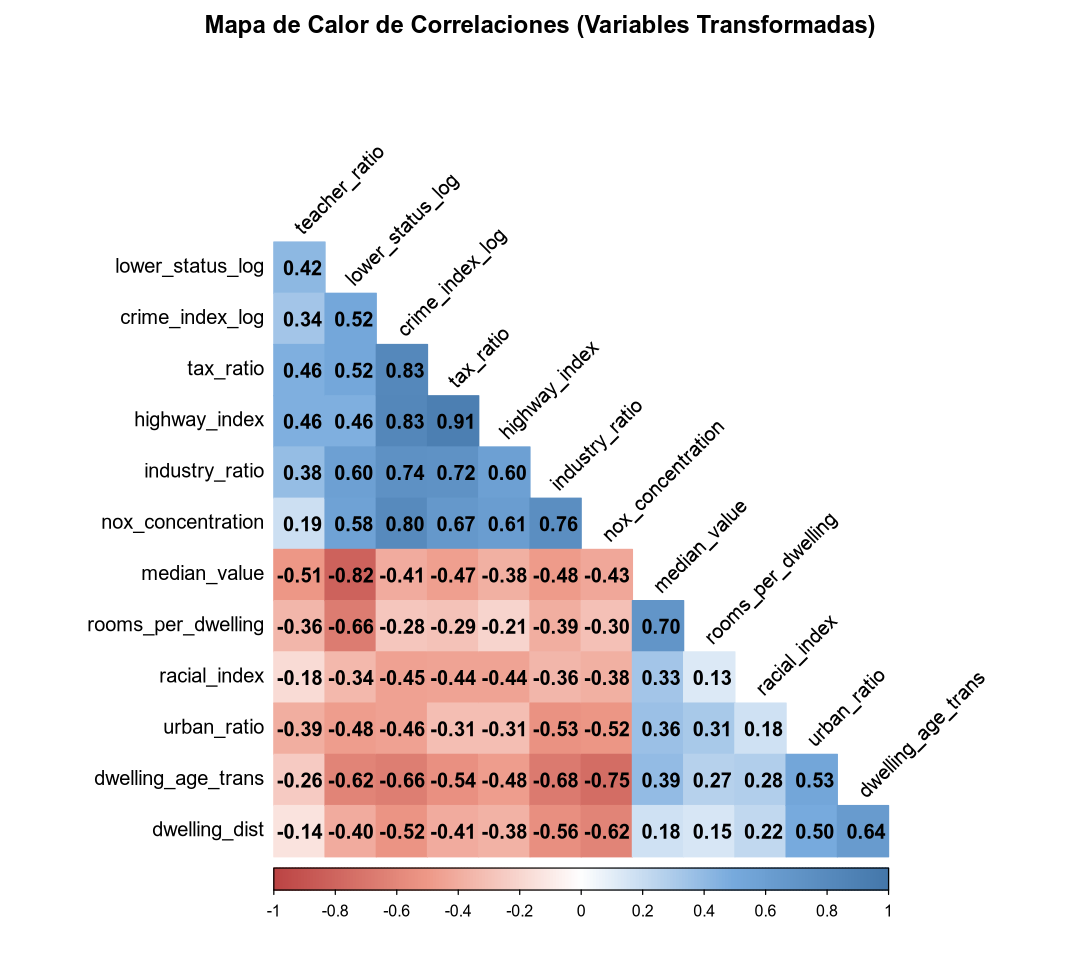

In [19]:
options(repr.plot.width = 9, repr.plot.height = 8)

vars_corr <- c(
  "median_value", "crime_index_log", "industry_ratio", "nox_concentration",
  "rooms_per_dwelling", "dwelling_age_trans", "dwelling_dist",
  "tax_ratio", "urban_ratio", "racial_index", "lower_status_log",
  "highway_index", "teacher_ratio"
)

M <- cor(df_clean[, vars_corr])

col_palette <- colorRampPalette(c(
  "#BB4444", "#EE9988",
  "#FFFFFF", "#77AADD", "#4477AA"
))

corrplot(M,
  method = "color",
  type = "lower",
  order = "hclust",
  addCoef.col = "black",
  tl.col = "black",
  tl.srt = 45,
  col = col_palette(200),
  diag = FALSE,
  number.cex = 1,
  tl.cex = 1,
  main = "Mapa de Calor de Correlaciones (Variables Transformadas)",
  mar = c(0, 0, 2, 0)
)

#### Análisis de la Matriz de Correlaciones

La matriz de correlaciones actúa como la validación definitiva para proceder con el Análisis de Componentes Principales. El gráfico revela una estructura de datos altamente interconectada, caracterizada por bloques de correlación intensos que indican redundancia de información.

1. Detección de Multicolinealidad (Justificación del PCA)

Si las variables fueran independientes, el PCA tendría poca utilidad. Sin embargo, observamos clusters de alta correlación que justifican la reducción de dimensionalidad:

* El Bloque "Infraestructura e Impuestos" (Azul Intenso):
    * La intersección entre `tax_ratio` y `highway_index` muestra un azul muy oscuro, indicando una correlación positiva extrema (0.91).
    * Las zonas con acceso directo a autopistas radiales sistemáticamente soportan una carga fiscal más elevada. Estas dos variables aportan información casi idéntica, por lo que el PCA las fusionará eficazmente. El crimen (`crime_index_log`) también se adhiere fuertemente a este bloque (correlación de 0.83 con ambas), sugiriendo que la inseguridad es sistémica en estas áreas de altos impuestos y alta accesibilidad vial.

* El Eje "Industrial vs. Residencial Moderno":
    * Existe una correlación positiva muy fuerte entre `industry_ratio` y `nox_concentration` (0.76). Las zonas industriales sufren mayor contaminación atmosférica.
    * Observación clave sobre la vivienda: La variable transformada `dwelling_age_trans` presenta un comportamiento inverso al bloque industrial (correlaciones negativas fuertes: -0.68 con industria y -0.75 con NOX). Esto indica que las zonas contaminadas e industriales tienden a tener un parque de viviendas opuesto a lo que representa esta variable transformada (es decir, si `age_trans` indica renovación/novedad, las zonas industriales tienen viviendas más antiguas).

* El Efecto de la Distancia (`dwelling_dist`):
    * Esta variable actúa como un "descompresor" urbano. Muestra una correlación negativa moderada-alta con la contaminación (-0.62) y la industria (-0.56).
    * A su vez, correlaciona positivamente con `dwelling_age_trans` (+0.64). Esto refuerza la dinámica espacial: a mayor distancia de los centros de empleo (generalmente más contaminados), aumenta el valor de la variable de edad transformada (sugiriendo viviendas más nuevas o renovadas en la periferia).

2. Relación con la Variable Objetivo (`median_value`)

Aunque el PCA es una técnica no supervisada, el análisis visual nos adelanta predictores clave:

* El motor del valor (+): `rooms_per_dwelling` muestra la correlación positiva más sólida con el precio (0.70). El tamaño de la vivienda sigue siendo el determinante individual más potente.
* El destructor de valor (-): `lower_status_log` presenta la correlación negativa más intensa del dataset (-0.82), validando la transformación logarítmica aplicada para capturar esta relación lineal inversa.

##### Conclusión para el Modelado

La matriz evidencia una severa multicolinealidad, especialmente el nexo impuestos-carreteras-crimen y la relación inversa entre el bloque industrial/contaminación y las características de la vivienda (`age_trans`).

1. Un modelo de Regresión Lineal Múltiple estándar sufriría de inestabilidad en los coeficientes debido a estas redundancias.
2. El PCA es la estrategia óptima para sintetizar estos grupos (ej. un componente de "Carga Urbana" que agrupe impuestos, carreteras y crimen) en factores ortogonales.

#### Análisis Visual de Relaciones Clave

Tras identificar en la matriz de correlación los predictores con mayor influencia teórica y estadística, es fundamental validar visualmente la naturaleza de estas relaciones antes de abstraerlas mediante técnicas de reducción de dimensión como el PCA.

El siguiente bloque de visualizaciones tiene un doble propósito estratégico:

1.  Validación de Linealidad: Verificar si las relaciones fuertes detectadas (ej. `lower_status` vs `median_value`) son efectivamente lineales. Esto confirmará si nuestras transformaciones (logaritmos, raíces) han sido exitosas para "enderezar" las curvas originales.
2.  Inspección de Dispersión: Observar cómo se comportan las variables clave (`rooms`, `crime`, `nox`) frente al precio, detectando visualmente si la varianza es constante (homocedasticidad) o si existen patrones de agrupación no detectados por el simple coeficiente de Pearson.

A continuación, generamos una matriz de pares para las variables más críticas y un panel de dispersión con líneas de tendencia para confirmar su poder predictivo individual.

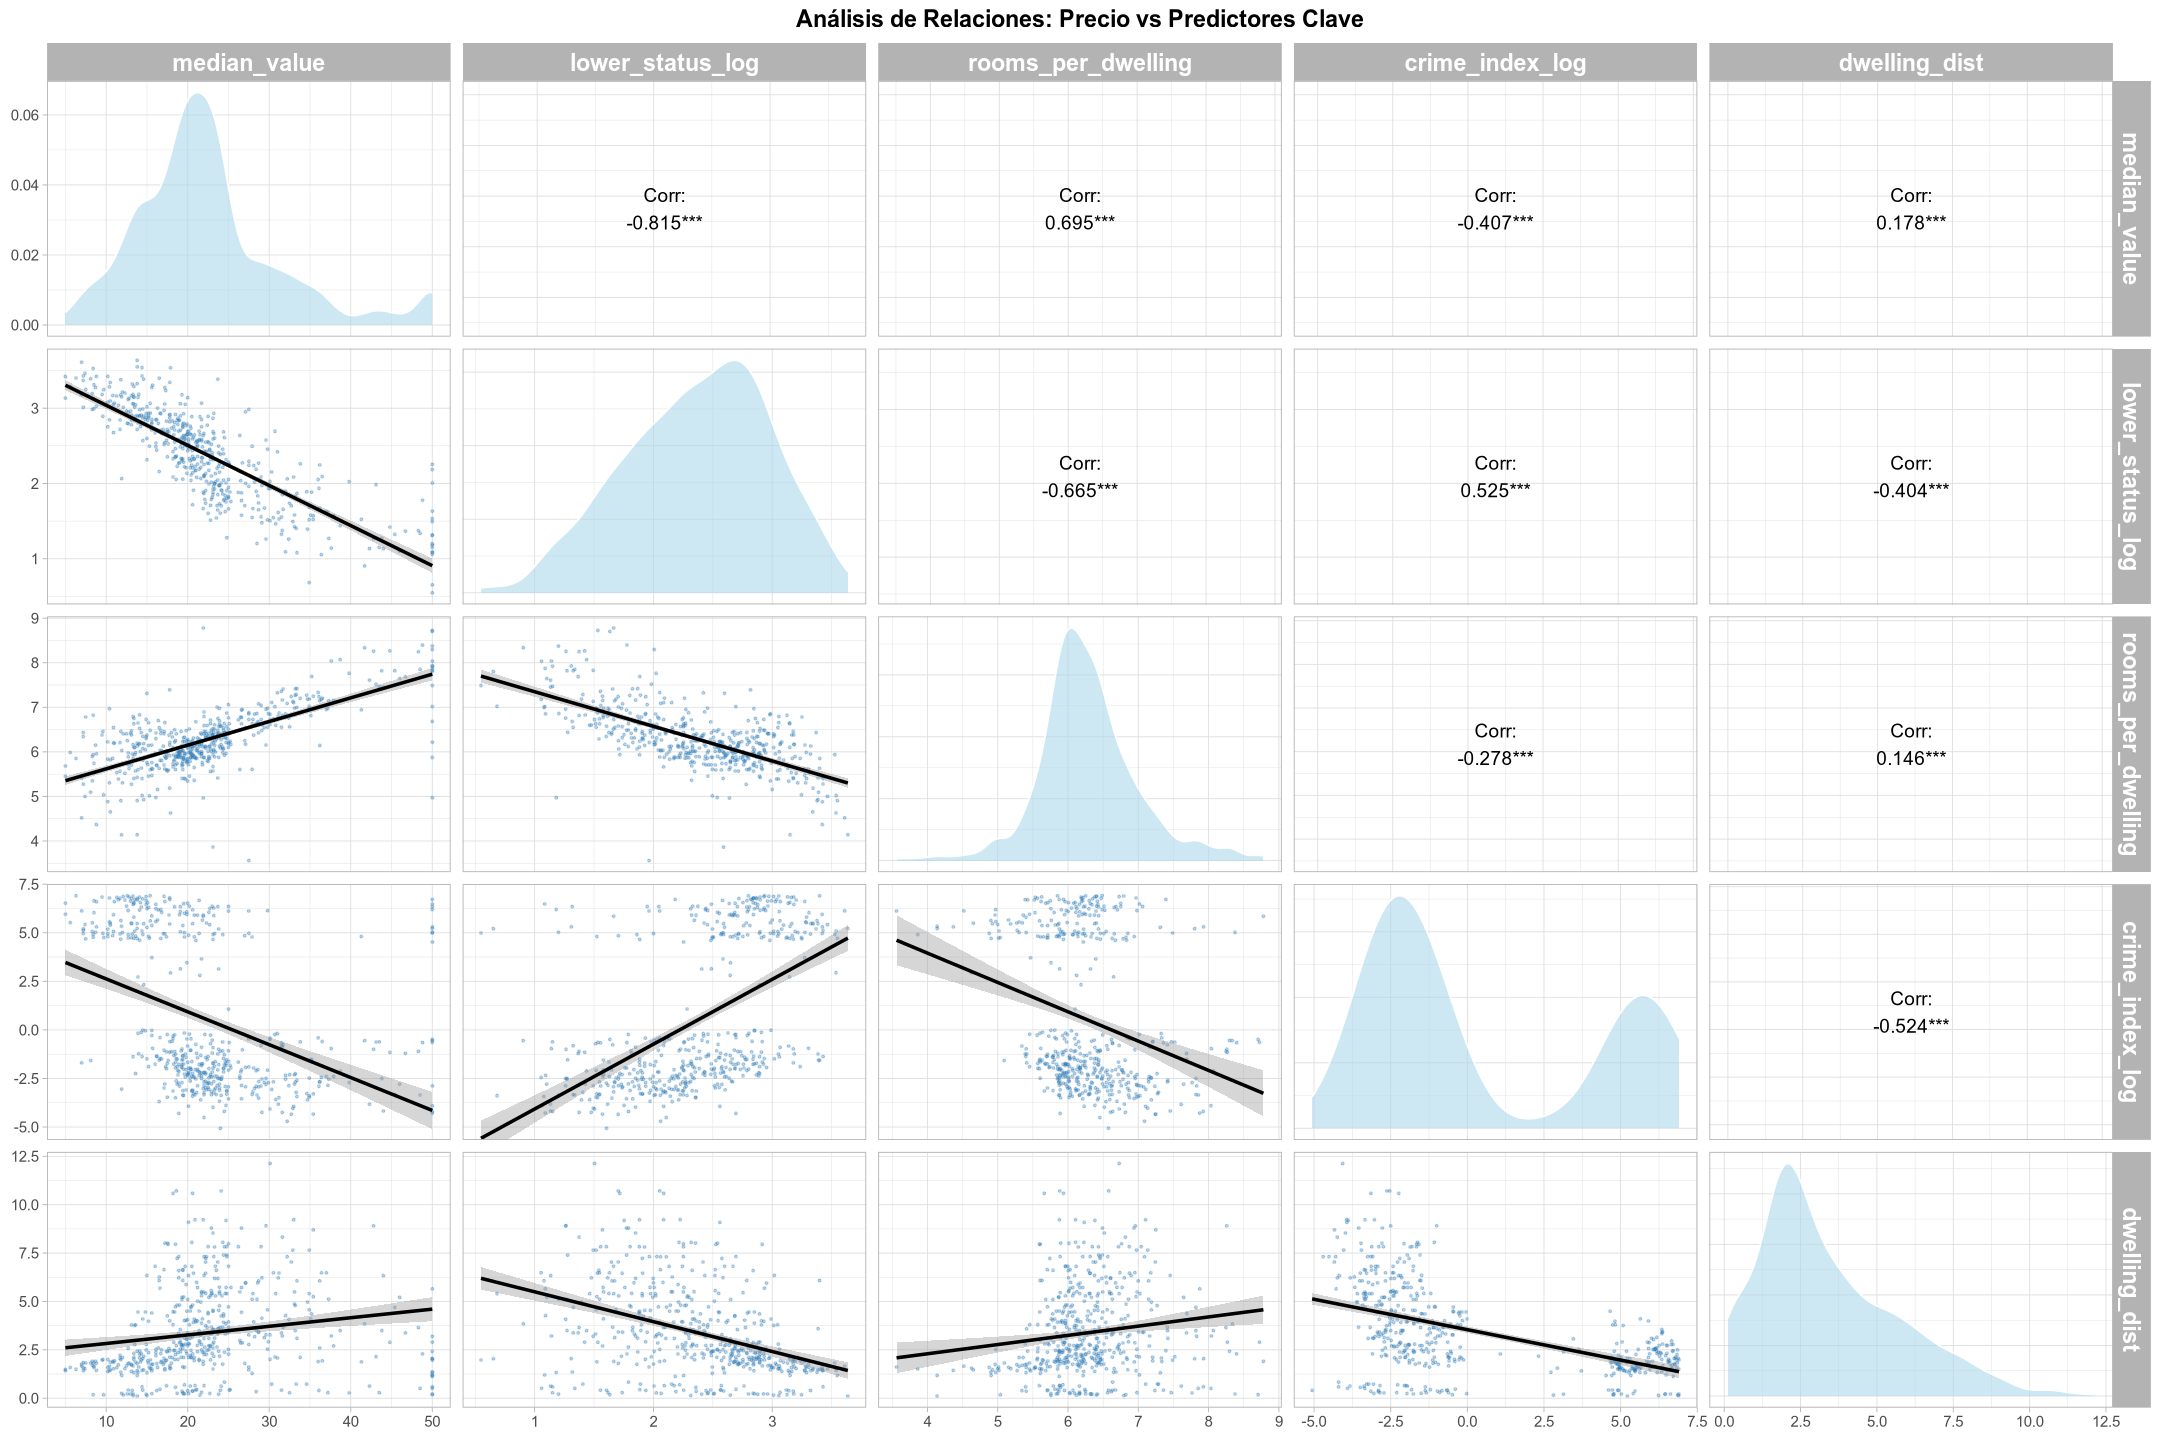

In [20]:
options(repr.plot.width = 18, repr.plot.height = 12)

vars_key <- df_clean[, c(
  "median_value", "lower_status_log",
  "rooms_per_dwelling", "crime_index_log", "dwelling_dist"
)]

ggpairs(vars_key,
  lower = list(continuous = wrap("smooth",
    alpha = 0.3, size = 0.5, color = "#2c7bb6"
  )),
  diag = list(continuous = wrap("densityDiag",
    fill = "#abd9e9", alpha = 0.6, color = "white"
  )),
  upper = list(continuous = wrap("cor", size = 4, color = "black")),
  title = "Análisis de Relaciones: Precio vs Predictores Clave"
) +
  theme_light() +
  theme(
    panel.spacing = unit(0.5, "lines"),
    strip.text = element_text(size = 14, face = "bold"),
    plot.title = element_text(hjust = 0.5, size = 14, face = "bold"),
    axis.text = element_text(size = 9)
  )

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


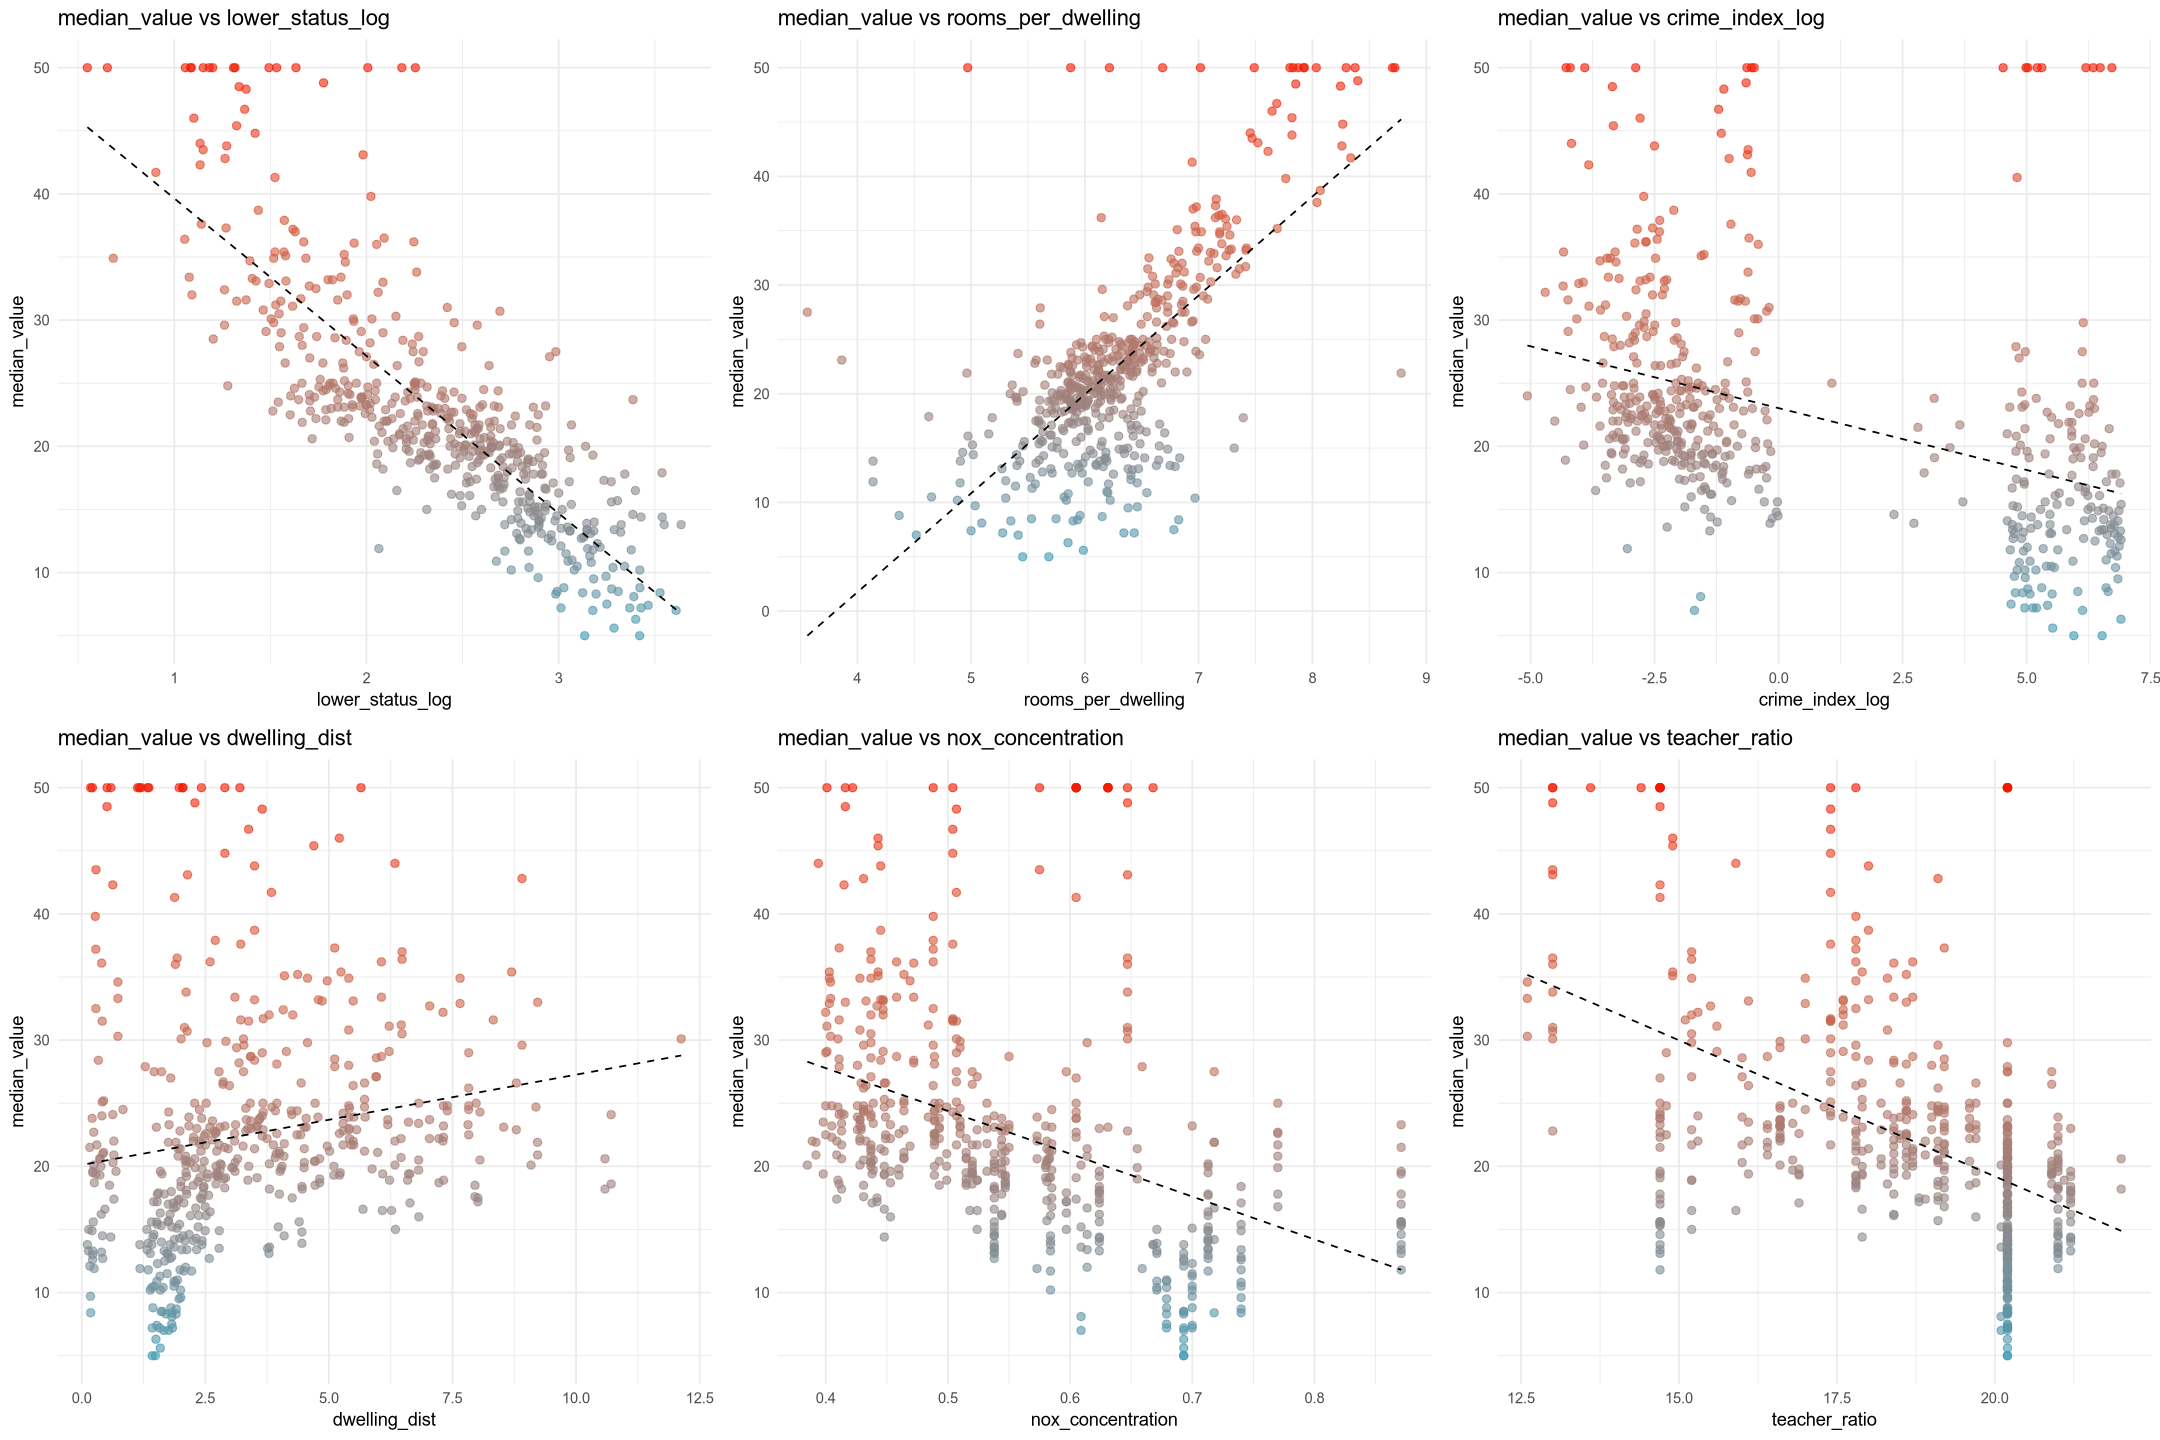

In [21]:
p1 <- ggplot(df_clean, aes(
  x = lower_status_log,
  y = median_value, color = median_value
)) +
  geom_point(alpha = 0.6, size = 2, show.legend = FALSE) +
  geom_smooth(
    method = "lm", color = "black",
    se = FALSE, linetype = "dashed",
    linewidth = 0.5
  ) +
  scale_color_gradient(
    low = "#3B9AB2",
    high = "#F21A00"
  ) +
  labs(
    title = "median_value vs lower_status_log",
    x = "lower_status_log", y = "median_value"
  ) +
  theme_minimal()

p2 <- ggplot(df_clean, aes(
  x = rooms_per_dwelling,
  y = median_value, color = median_value
)) +
  geom_point(alpha = 0.6, size = 2, show.legend = FALSE) +
  geom_smooth(
    method = "lm", color = "black",
    se = FALSE, linetype = "dashed", linewidth = 0.5
  ) +
  scale_color_gradient(
    low = "#3B9AB2",
    high = "#F21A00"
  ) +
  labs(
    title = "median_value vs rooms_per_dwelling",
    x = "rooms_per_dwelling", y = "median_value"
  ) +
  theme_minimal()

p3 <- ggplot(df_clean, aes(
  x = crime_index_log,
  y = median_value, color = median_value
)) +
  geom_point(alpha = 0.6, size = 2, show.legend = FALSE) +
  geom_smooth(
    method = "lm", color = "black",
    se = FALSE, linetype = "dashed", linewidth = 0.5
  ) +
  scale_color_gradient(
    low = "#3B9AB2",
    high = "#F21A00"
  ) +
  labs(
    title = "median_value vs crime_index_log",
    x = "crime_index_log", y = "median_value"
  ) +
  theme_minimal()

p4 <- ggplot(df_clean, aes(
  x = dwelling_dist,
  y = median_value, color = median_value
)) +
  geom_point(alpha = 0.6, size = 2, show.legend = FALSE) +
  geom_smooth(
    method = "lm", color = "black", se = FALSE,
    linetype = "dashed", linewidth = 0.5
  ) +
  scale_color_gradient(low = "#3B9AB2", high = "#F21A00") +
  labs(
    title = "median_value vs dwelling_dist",
    x = "dwelling_dist", y = "median_value"
  ) +
  theme_minimal()

p5 <- ggplot(df_clean, aes(
  x = nox_concentration,
  y = median_value, color = median_value
)) +
  geom_point(alpha = 0.6, size = 2, show.legend = FALSE) +
  geom_smooth(
    method = "lm", color = "black", se = FALSE,
    linetype = "dashed", linewidth = 0.5
  ) +
  scale_color_gradient(low = "#3B9AB2", high = "#F21A00") +
  labs(
    title = "median_value vs nox_concentration",
    x = "nox_concentration", y = "median_value"
  ) +
  theme_minimal()

p6 <- ggplot(df_clean, aes(
  x = teacher_ratio,
  y = median_value, color = median_value
)) +
  geom_point(alpha = 0.6, size = 2, show.legend = FALSE) +
  geom_smooth(
    method = "lm", color = "black", se = FALSE,
    linetype = "dashed", linewidth = 0.5
  ) +
  scale_color_gradient(low = "#3B9AB2", high = "#F21A00") +
  labs(
    title = "median_value vs teacher_ratio",
    x = "teacher_ratio", y = "median_value"
  ) +
  theme_minimal()

grid.arrange(p1, p2, p3, p4, p5, p6, ncol = 3)

#### Interpretación de los Gráficos
El análisis visual revela patrones críticos que validan las transformaciones y justifican el paso al PCA:

1. Linealidad Reforzada en Predictores Principales:
    * Estatus (`lower_status_log`) vs. Precio: La relación es notablemente lineal y negativa (Corr: -0.815). La transformación logarítmica ha funcionado perfectamente, eliminando la curvatura original ("banana") y mostrando una pendiente constante: a medida que aumenta el estatus bajo (log), el valor de la vivienda cae sistemáticamente.
    * Habitaciones (`rooms_per_dwelling`) vs. Precio: Muestra una correlación positiva limpia y fuerte (0.695). Sin embargo, el gráfico delata nuevamente el efecto techo: se observa una línea horizontal de puntos en el valor máximo del precio (50k), lo que indica que la relación lineal se rompe artificialmente en el segmento de lujo debido a la censura de datos.

2. Identificación de Estructuras Complejas (Heterocedasticidad):
    * Crimen (`crime_index_log`) vs. Precio: Aunque la transformación ha mejorado la dispersión, la relación no es perfectamente uniforme. Se observa un patrón de "embudo":
        * En zonas de bajo crimen (izquierda), la varianza de precios es enorme (hay casas baratas y caras).
        * En zonas de alto crimen (derecha), el precio colapsa y la varianza disminuye drásticamente. El crimen actúa como un "techo" para el valor: es imposible tener una casa cara en una zona de muy alta criminalidad.

3. Confirmación Visual de Multicolinealidad:
    * La matriz de pares expone la redundancia entre predictores. Un ejemplo claro visible en el gráfico es la relación entre `lower_status_log` y `rooms_per_dwelling` (Corr: -0.665).
    * Existe una fuerte correlación inversa: las zonas de menor estatus tienden sistemáticamente a tener viviendas más pequeñas. Esta superposición de información confirma que ambas variables comparten una "dimensión latente" común que el PCA deberá fusionar.

Conclusión para el Informe:
> "El análisis visual confirma que las transformaciones han logrado linealizar eficazmente las relaciones más potentes con el *target*, especialmente en `lower_status`. Sin embargo, la fuerte interrelación observada entre los propios predictores (ej. estatus vs. tamaño, crimen vs. distancia) y la varianza compleja en variables como el crimen, ratifican la necesidad del Análisis de Componentes Principales (PCA). El PCA es indispensable para sintetizar esta información redundante en factores ortogonales que simplifiquen el modelado posterior."

### <font color='#3d59c6'> Análisis de Componentes Principales (PCA) </font>
Dado que existen fuertes correlaciones entre grupos de variables (ej. impuestos, accesibilidad e industria), aplicamos PCA para reducir la dimensionalidad y evitar la redundancia.

Se ha utilizado la matriz estandarizada `data_pca` (media 0, desviación 1) preparada en la fase anterior.

Resumen de Varianza Acumulada


Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6    PC7
Standard deviation     2.5215 1.1402 1.1019 0.8967 0.81791 0.64786 0.6040
Proportion of Variance 0.5299 0.1083 0.1012 0.0670 0.05575 0.03498 0.0304
Cumulative Proportion  0.5299 0.6382 0.7394 0.8064 0.86211 0.89709 0.9275
                           PC8     PC9    PC10    PC11    PC12
Standard deviation     0.55602 0.46032 0.41417 0.34371 0.24372
Proportion of Variance 0.02576 0.01766 0.01429 0.00984 0.00495
Cumulative Proportion  0.95325 0.97091 0.98521 0.99505 1.00000

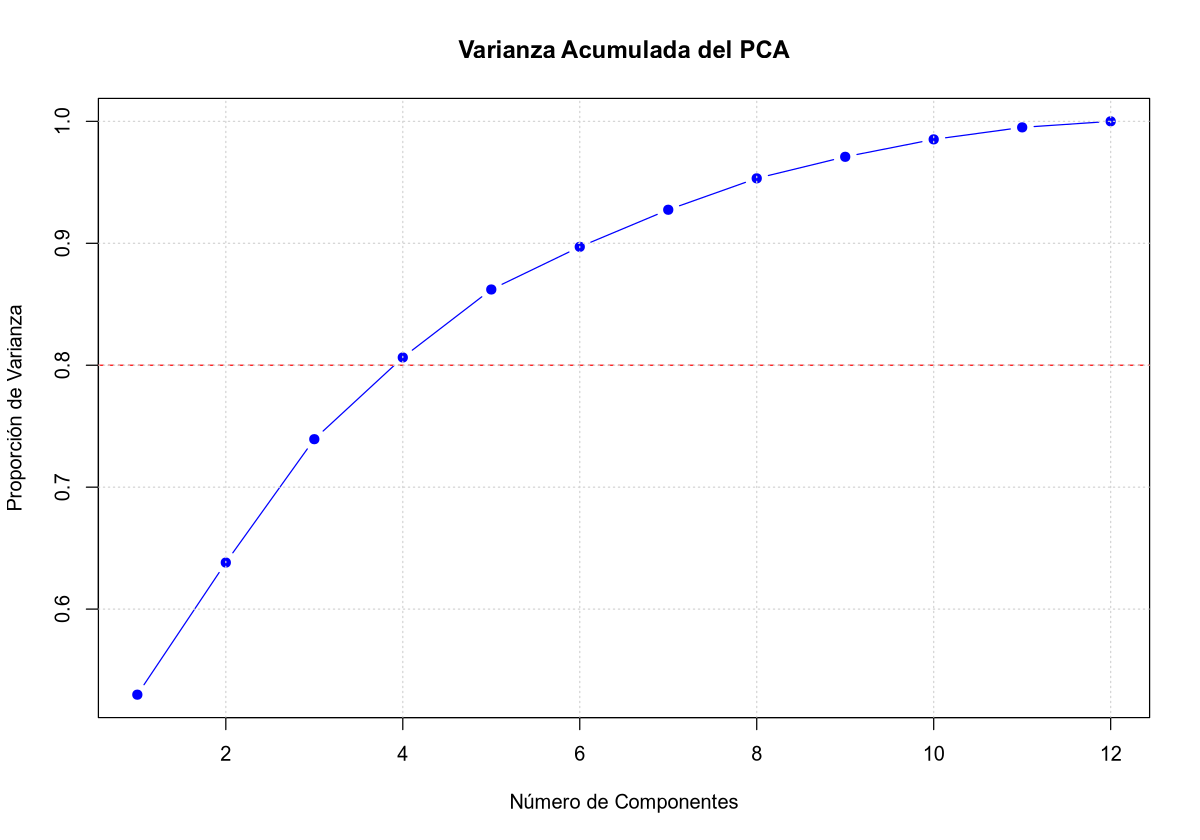

In [22]:
options(repr.plot.width = 10, repr.plot.height = 7)

pca_result <- prcomp(data_pca, center = FALSE, scale. = FALSE)

cat("Resumen de Varianza Acumulada\n")
summary(pca_result)

varianza_explicada <- pca_result$sdev^2 / sum(pca_result$sdev^2)

plot(cumsum(varianza_explicada),
  type = "b", pch = 19, col = "blue",
  main = "Varianza Acumulada del PCA",
  xlab = "Número de Componentes", ylab = "Proporción de Varianza"
)
abline(h = 0.80, col = "red", lty = 2)
grid()

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
ℹ The deprecated feature was likely used in the ggpubr package.
  Please report the issue at <https://github.com/kassambara/ggpubr/issues>.”
Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.
ℹ The deprecated feature was likely used in the factoextra package.
  Please report the issue at <https://github.com/kassambara/factoextra/issues>.”


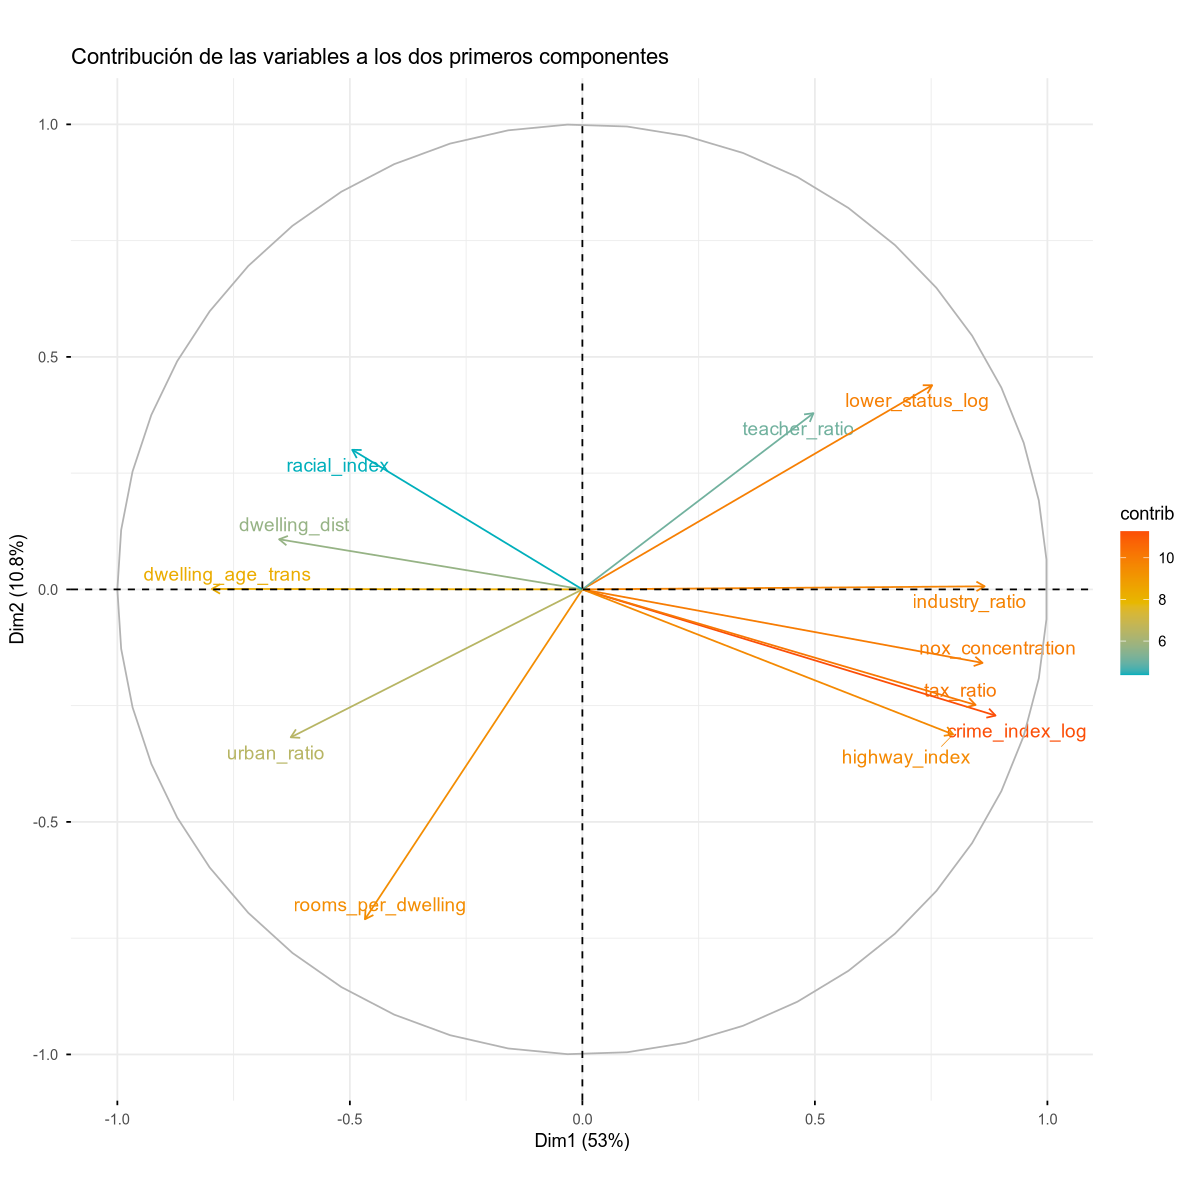

In [25]:
options(repr.plot.width = 10, repr.plot.height = 10)

fviz_pca_var(pca_result,
  col.var = "contrib",
  gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
  repel = TRUE,
  title = "Contribución de las variables a los dos primeros componentes"
)

## <font color='#3d59c6'> 3. Análisis de ANOVA </font>

## <font color='#3d59c6'> 4. Desarrollo y justificación de las variables </font>

## <font color='#3d59c6'> 5. Estudio de regresión lineal del median_value </font>